# **Project Name**    - Amazon Prime EDA Project



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Member 1 -** Aswathy Gopalakrishnan


# **Project Summary -**

The aim of this project is to analyze the Amazon Prime content library to identify opportunities for strategic growth and content optimization. To achieve this, we begin by thoroughly understanding the available datasets 'titles.csv' and 'credits.csv' , which included a list of titles with detailed features such as genres, release years, ratings, and popularity metrics, along with a separate set of credits detailing actors and directors associated with each title.

The next step involves merging these datasets to create a comprehensive view of each title, linking content features with the talent involved. During this process,  data ambiguities are handled. The fields in the data sets are cleaned and standardized to ensure accurate analysis. Duplicates and missing values are removed and handled respectively to maintain the integrity of the dataset.

With a clean, integrated dataset, we proceed to perform a detailed data analysis. This involved exploring various aspects of the content, such as content diversity across genres and regions, trends in content addition over time, and the relationship between viewer ratings and popularity metrics. Additionally, the contributions of key actors and directors are also analysed, aiming to identify influential factors.

Throughout the analysis, significant attention is given to data quality and accuracy. Proper data preprocessing steps is applied to facilitate meaningful insights, including selecting relevant features, encoding categorical variables appropriately, and ensuring that comparisons are based on unique, reliable data points. After that a correlation analysis is done to identify most correlated features which can aid for development of models in future to identify trends and patterns, and use for efficient marketing and display of content on the platform.

The overall goal is to uncover patterns and trends that could inform content acquisition, marketing strategies, and regional focus areas. By understanding which types of content perform well and which segments have growth potential, the insights derived will support data-driven decision-making aimed at maximizing viewer engagement, subscription growth, and competitive advantage.


# **GitHub Link -**

https://github.com/aswathy2410

# **Problem Statement**


We need to analyze and extract valuable insights:
  
Content diversity: what genres and categories dominate the platform?  
regional availability: How does content distribution vary across different regions?  
Trends over time: How has amazon prime's content library evolved?  
IMDb ratings & popularity: What are the highest rated or most popular shows on the platform?  
  
By analyzing this dataset, we can influence the subscription growth, user engagement, and content investment strategies in the streaming industry. 


#### **Define Your Business Objective?**

The goal is to analyze Amazon Prime's content library using data-driven insights to enhance viewer engagement, increase subscriptions, and optimize content investment strategies. 


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [51]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Setting visualisation style

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

### Dataset Loading

In [52]:
# Load the datasets titles.csv and credits.csv

try:
    titles = pd.read_csv('titles.csv')
    credits = pd.read_csv('credits.csv')
    
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print("Error: One or both dataset files are missing. Please check the file paths.")
    raise e
except pd.errors.EmptyDataError as e:
    print("Error: One of the datasets is empty. Please check the CSV files.")
    raise e
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    raise e

Datasets loaded successfully.


### Dataset First View

In [53]:
# Dataset First Look
# View the first few rows of each dataset to understand their structure

print("First 5 rows of titles dataset:")
display(titles.head())

print("First 5 rows of credits dataset:")
display(credits.head())


First 5 rows of titles dataset:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


First 5 rows of credits dataset:


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [54]:
# Dataset Rows & Columns count
# Inspect the number of rows and columns in each dataset
# Using shape function which displays it as (rows, columns)
print(f"Titles dataset shape: {titles.shape}") 
print(f"Credits dataset shape: {credits.shape}")

Titles dataset shape: (9871, 15)
Credits dataset shape: (124235, 5)


### Dataset Information

In [55]:
# Dataset Info
# Printing the dataset information to understand the datatypes
print("Titles Dataset Info:")
titles.info()

print("\nCredits Dataset Info:")
credits.info()

Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtype

#### Duplicate Values

First, finding and handling the duplicate entries in titles dataset

In [56]:
# Find duplicate entries in title dataset
duplicates_titles = titles[titles.duplicated(subset=['id','title'], keep=False)]
print(f"\nNumber of duplicate 'id' entries in titles dataset: {len(duplicates_titles)}")

# Print the duplicate entries to verify
if len(duplicates_titles) > 0:
    print("Duplicate entries in titles dataset:")
    display(duplicates_titles)

# Handling the duplicates by keeping only one of the entries   
titles = titles.drop_duplicates(subset=['id'], keep='first')

# Verifying if duplicates are deleted
duplicates_titles = titles[titles.duplicated(subset=['id'], keep=False)]
print(f"\nNumber of duplicate 'id' entries in titles dataset: {len(duplicates_titles)}")



Number of duplicate 'id' entries in titles dataset: 6
Duplicate entries in titles dataset:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
479,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
718,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
719,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN



Number of duplicate 'id' entries in titles dataset: 0


Finding and handling duplicates in credits dataset

In [57]:
# Finding the duplicate entries by 'id', 'person_id','character','role' in the credits datset
duplicates_credits = credits[credits.duplicated(subset=['id', 'person_id','character','role'], keep=False)]
print(f"Number of duplicate ('id', 'person_id','character','role') entries in credits dataset: {len(duplicates_credits)}")

#Sorting the results to display and understand better
sorted_duplicates = duplicates_credits.sort_values(by=['id', 'person_id','character','role'])

# Displaying duplicates to verify
if len(sorted_duplicates) > 0:
    print("Duplicates in credits dataset:")
    display(sorted_duplicates)

# Drop duplicates keeping only the first one
credits = credits.drop_duplicates(subset=['id', 'person_id','character','role'], keep='first')

# Checking for duplicates again to verify
duplicates_credits = credits[credits.duplicated(subset=['id', 'person_id','character','role'], keep=False)]
print(f"\nNumber of duplicate ('id', 'person_id','character','role') entries in credits dataset: {len(duplicates_credits)}")

Number of duplicate ('id', 'person_id','character','role') entries in credits dataset: 112
Duplicates in credits dataset:


,person_id,id,name,character,role
12974,21688,tm137955,Beryl Mercer,Mom,ACTOR
13026,21688,tm137955,Beryl Mercer,Mom,ACTOR
12975,53498,tm137955,Joseph Cawthorn,Pop,ACTOR
13027,53498,tm137955,Joseph Cawthorn,Pop,ACTOR
12978,60949,tm137955,Sidney Bracey,Hopkins,ACTOR
...,...,...,...,...,...
9177,571390,tm89134,Jerry Sheldon,Henchman,ACTOR
9144,571391,tm89134,Silver,Silver,ACTOR
9168,571391,tm89134,Silver,Silver,ACTOR
9148,685522,tm89134,Frederick Gee,Gibbs Baby,ACTOR



Number of duplicate ('id', 'person_id','character','role') entries in credits dataset: 0


Duplicates are handled effectively.

#### Missing Values/Null Values

In [58]:
# Missing Values/Null Values Count

# Check for missing values in titles dataset
print("Null values in titles dataset:")
print(titles.isnull().sum())

# Check for missing values in credits dataset
print("Null values in credits dataset:")
print(credits.isnull().sum())

Null values in titles dataset:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6484
runtime                    0
genres                     0
production_countries       0
seasons                 8511
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2080
dtype: int64
Null values in credits dataset:
person_id        0
id               0
name             0
character    16277
role             0
dtype: int64


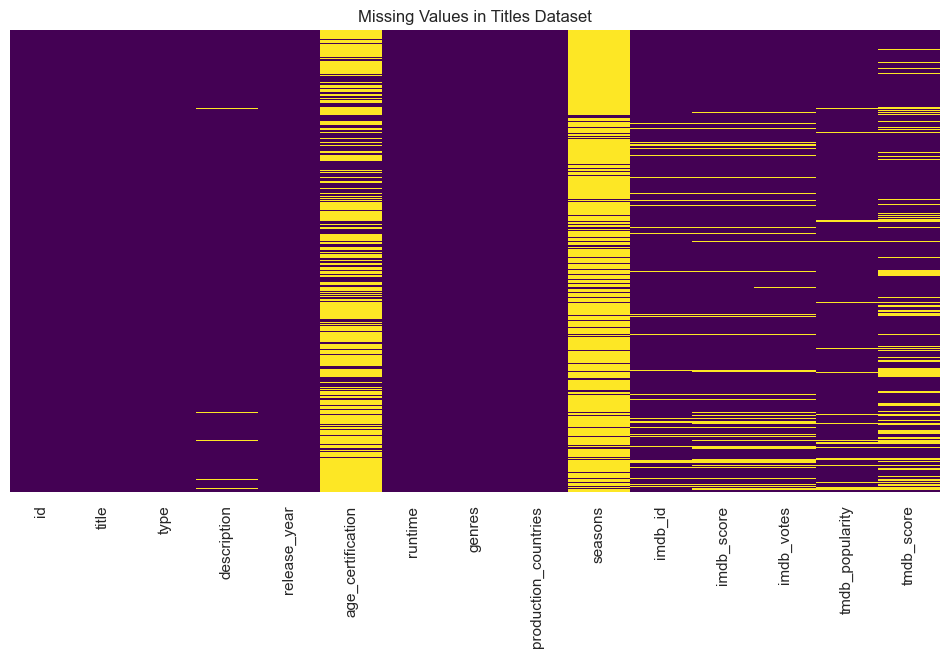

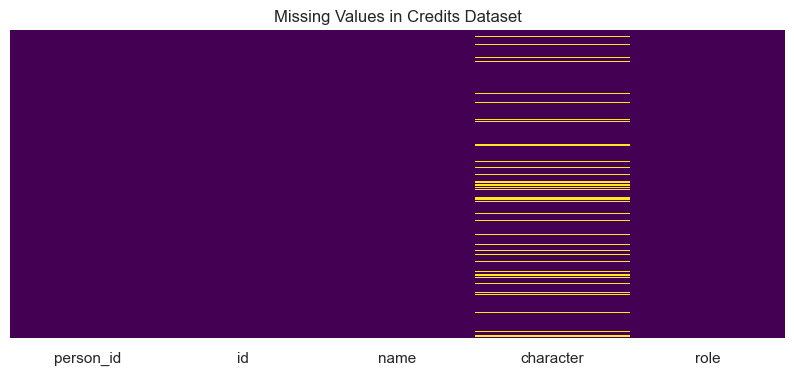

In [59]:
# Visialising the missing values using a heat map to understand the distribution

# Visualize missing values in titles dataset
plt.figure(figsize=(12, 6))
sns.heatmap(titles.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Titles Dataset')
plt.show()

# Visualize missing values in credits dataset
plt.figure(figsize=(10, 4))
sns.heatmap(credits.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Credits Dataset')
plt.show()


Handling the missing values based on the feature description and relevance:
The string values are given as empty string, not specified or N?A. while the numbers which are mostly rating, if not specified are given as 0.

For titles datset, description(119) will be given as empty string, age_certification(6484) as 'Not specified', seasons(8511) as 0, and the imdb_id(667) as 'N/A', imdb_score(1021), imdb_votes(1031),tmdb_popularity(547) and tmdb_score(2080) as 0.

For credits dataset, only the 'character' values are missing, and it's for the rows where the role is director. Hence it will be set as 'N/A'.

In [60]:
# Handling missing values in titles dataset
titles['description'] = titles['description'].fillna('')
titles['age_certification'] = titles['age_certification'].fillna('Not specified')
titles['seasons'] = titles['seasons'].fillna(0).astype(int)
titles['imdb_id'] = titles['imdb_id'].fillna('N/A')
titles['imdb_score'] = titles['imdb_score'].fillna(0)
titles['imdb_votes'] = titles['imdb_votes'].fillna(0)
titles['tmdb_popularity'] = titles['tmdb_popularity'].fillna(0)
titles['tmdb_score'] = titles['tmdb_score'].fillna(0)
print(titles.isnull().sum())

# handling missing values in credits dataset
credits['character'] = credits['character'].fillna('N/A')
print(credits.isnull().sum())


id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64
person_id    0
id           0
name         0
character    0
role         0
dtype: int64


The missing values are handled effectively.

### Merging both datasets

Merging both titles and credits datasets for visualization and analysis purposes

In [61]:
try:
    combined_df = pd.merge(titles, credits, on='id', how='left', suffixes=('_title', '_credit'))
    print("Datasets merged successfully.")
except Exception as e:
    print("Error during merging datasets:", e)

# Step 3: Verify the combined dataset
print(f"\nCombined dataset shape: {combined_df.shape}")
print("\nHead of combined dataset:")
display(combined_df.head())

Datasets merged successfully.

Combined dataset shape: (125186, 19)

Head of combined dataset:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not specified,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0,tt0017925,8.2,89766.0,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not specified,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0,tt0017925,8.2,89766.0,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR


Displaying the info of combined datset

In [62]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125186 entries, 0 to 125185
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125186 non-null  object 
 1   title                 125186 non-null  object 
 2   type                  125186 non-null  object 
 3   description           125186 non-null  object 
 4   release_year          125186 non-null  int64  
 5   age_certification     125186 non-null  object 
 6   runtime               125186 non-null  int64  
 7   genres                125186 non-null  object 
 8   production_countries  125186 non-null  object 
 9   seasons               125186 non-null  int64  
 10  imdb_id               125186 non-null  object 
 11  imdb_score            125186 non-null  float64
 12  imdb_votes            125186 non-null  float64
 13  tmdb_popularity       125186 non-null  float64
 14  tmdb_score            125186 non-null  float64
 15  

Checking for null values and verifying the same

In [63]:
# Display rows with any null values
rows_with_nan = combined_df[combined_df.isnull().any(axis=1)]

# Show first few rows with missing data for inspection
print("Rows with missing values:")
display(rows_with_nan.head())

# Count total missing values per column
missing_counts = combined_df.isnull().sum()
print("\nMissing values per column in the combined dataset:")
print(missing_counts)

Rows with missing values:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
2063,tm348419,Payoff in the Pacific,MOVIE,A documentary on .S. efforts against the Japan...,1945,Not specified,56,[],[],0,N/A,0.0,0.0,0.6,0.0,NaN,NaN,NaN,NaN
7531,tm18966,D-Day: The Normandy Invasion,MOVIE,Focusing on both the strategic overview of the...,1945,Not specified,21,[],[],0,N/A,0.0,0.0,0.6,8.0,NaN,NaN,NaN,NaN
12237,tm582037,Ye Shang Hai,MOVIE,,1941,Not specified,62,['drama'],[],0,tt3594666,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
13110,tm686160,Peculiar Pets,MOVIE,"In this documentary, we meet the families whom...",1921,Not specified,47,['documentation'],[],0,tt0981329,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
14044,tm769632,Sri Valli,MOVIE,"Valli, a tribal girl falls in love with Muruga...",1945,Not specified,114,['drama'],[],0,tt0240922,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN



Missing values per column in the combined dataset:
id                         0
title                      0
type                       0
description                0
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
person_id               1007
name                    1007
character               1007
role                    1007
dtype: int64


After analysis, these are movies which are less known, doesn't have proper details or character name. Hence, the missing values are marked as 'Unknown'

In [64]:
# Fill missing with 'Unknown'
combined_df['name'] = combined_df['name'].fillna('Unknown')
combined_df['character'] = combined_df['character'].fillna('Unknown')
combined_df['person_id'] = combined_df['person_id'].fillna('Unknown')
combined_df['role'] = combined_df['role'].fillna('Unknown')

# Verify no nulls remain in these columns
print("Null counts after filling missing actor info:")
print(combined_df[['person_id', 'name', 'character', 'role']].isnull().sum())

Null counts after filling missing actor info:
person_id    0
name         0
character    0
role         0
dtype: int64


### What did you know about your dataset?



There are two datasets, titles.csv and credits.csv. The titles dataset has 9868 rows and 15 columns, after cleaning. It contains the list of all amazon prime shows, their details and their ratings on platform like IMDb. While credit dataset has 124234 rows and 5 columns. It shows the details of actors, their roles and characters in various prime shows. The combined datset has 125185 rows and 19 columns combining the information from both the datasets

## ***2. Understanding Your Variables***

In [65]:
# Dataset Columns
print("Dataset Columns:")
print(combined_df.columns.tolist())

Dataset Columns:
['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'person_id', 'name', 'character', 'role']


In [66]:
# Dataset Describe

#descriptive statistics for numerical valiables
print("\nDescriptive statistics for numerical variables:")
display(combined_df.describe())

# value counts for categorical variables
print("\nValue counts for 'type':")
print(combined_df['type'].value_counts())

print("\nValue counts for 'genres':")
print(combined_df['genres'].value_counts())

print("\nValue counts for 'age_certification':")
print(combined_df['age_certification'].value_counts())

print("\nValue counts for 'production_countries':")
print(combined_df['production_countries'].value_counts())


Descriptive statistics for numerical variables:


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,125186.000000,125186.000000,125186.000000,125186.000000,1.251860e+05,125186.000000,125186.00000
mean,1996.448261,95.348018,0.158588,5.667694,2.196194e+04,10.102100,5.46613
std,27.703798,30.393953,1.012580,1.786545,8.608930e+04,40.608177,2.11511
min,1912.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,1983.000000,83.000000,0.000000,5.000000,2.100000e+02,1.841000,5.00000
50%,2009.000000,93.000000,0.000000,6.000000,1.050000e+03,3.857000,6.00000
75%,2018.000000,109.000000,0.000000,6.800000,6.268000e+03,8.773000,6.80000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.00000



Value counts for 'type':
type
MOVIE    116685
SHOW       8501
Name: count, dtype: int64

Value counts for 'genres':
genres
['drama']                                            10002
['comedy']                                            5680
['drama', 'romance']                                  2519
['documentation']                                     2512
['horror']                                            2461
                                                     ...  
['documentation', 'family', 'sport']                     1
['family', 'action', 'drama', 'romance', 'sport']        1
['history', 'horror', 'scifi', 'drama']                  1
['reality', 'action', 'european']                        1
['documentation', 'drama', 'sport', 'european']          1
Name: count, Length: 2028, dtype: int64

Value counts for 'age_certification':
age_certification
Not specified    68329
R                25941
PG-13            12506
PG                9641
G                 3845
TV-MA          

### Variables Description

id : The id on JustWatch  
title : The name of the title  
type : Show type (Movie, TV shows)  
description : A brief description  
release_year : The year of release  
age_certification : The age certification  
runtime : The length of the show  
genres : List of genres involved  
production_countries : A list of countries that produced the title  
seasons : Number of seasons if it is a show  
imdb_id : Title id on IMDB  
imdb_score : Score on IMDB  
imdb_votes : Votes on IMDB  
tmdb_popularity : Popularity on TMDB  
tmdb_score : Score on TMDB  
person_ID : The person id on JustWatch  
id : The title id  
name : Actor's or Director's name  
character_name : The character name  
role : Actor or Director roles  
  
From the description, the following could be understood:  
The dataset is highly diverse. It is dominated by movies with over 116,000 titles and has only around 8,500 TV shows. It has a wide array of genres, with drama, comedy, and romance being the most prevalent and has broad audience appeal. The collection spans over a century, from 1912 to 2022, but the most are recent with the median being 2009. Runtime varies widely, averaging around 95 minutes, though many entries have incomplete or placeholder data. Audience ratings are moderate overall, with an average IMDb score of approximately 5.67. We can observe a wide variation in viewer votes and popularity which could be due to a mix of blockbuster hits and lesser known content.

### Check Unique Values for each variable.

In [67]:
# Loop through each column and display the number of unique values and a sample
for column in combined_df.columns:
    unique_vals = combined_df[column].dropna().unique()
    print(f"\nColumn: {column}")
    print(f"Number of unique values: {len(unique_vals)}")
    # Display first 10 unique values
    print(f"Sample values: {unique_vals[:10]}")


Column: id
Number of unique values: 9868
Sample values: ['ts20945' 'tm19248' 'tm82253' 'tm83884' 'tm56584' 'tm160494' 'tm87233'
 'tm19424' 'tm116781' 'tm112005']

Column: title
Number of unique values: 9737
Sample values: ['The Three Stooges' 'The General' 'The Best Years of Our Lives'
 'His Girl Friday' 'In a Lonely Place' 'Stagecoach'
 "It's a Wonderful Life" 'Detour' 'My Man Godfrey' 'Marihuana']

Column: type
Number of unique values: 2
Sample values: ['SHOW' 'MOVIE']

Column: description
Number of unique values: 9735
Sample values: ["The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In films, the stooges were commonly known by their actual first names. There were a total of six stooges over the act's run (with only three active at any given time), but Moe Howard and Larr

## 3. ***Data Wrangling***

### Data Wrangling Code

In [68]:
# Making sure the datatypes are properly assigned
numeric_cols = ['seasons', 'runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'release_year']
for col in numeric_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Double-check conversion
print(combined_df[numeric_cols].dtypes)

seasons              int64
runtime              int64
imdb_score         float64
imdb_votes         float64
tmdb_popularity    float64
tmdb_score         float64
release_year         int64
dtype: object


In [69]:
# Convert 'genres' from string to list 
import ast

def convert_to_list(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

combined_df['genres_list'] = combined_df['genres'].apply(convert_to_list)

# Extract main genres (top 1 or 2)
combined_df['top_2_genres_list'] = combined_df['genres_list'].apply(lambda x: x[:2] if len(x) >= 1 else [])


In [70]:
# Extract decade from release year
combined_df['decade'] = (combined_df['release_year'] // 10) * 10
combined_df['decade_str'] = combined_df['decade'].astype(int).astype(str) + 's'
combined_df = combined_df.drop('decade', axis=1)
# Flag for movies vs. TV shows
combined_df['is_movie'] = combined_df['type'].apply(lambda x: 1 if x.upper() == 'MOVIE' else 0)


In [71]:
combined_df['primary_genre'] = combined_df['genres_list'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown'
)

In [72]:
combined_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,tmdb_score,person_id,name,character,role,genres_list,top_2_genres_list,decade_str,is_movie,primary_genre
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26,...,7.6,59401.0,Joe Besser,Joe,ACTOR,"[comedy, family, animation, action, fantasy, h...","[comedy, family]",1930s,0,comedy
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26,...,7.6,31460.0,Moe Howard,Moe,ACTOR,"[comedy, family, animation, action, fantasy, h...","[comedy, family]",1930s,0,comedy
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26,...,7.6,31461.0,Larry Fine,Larry,ACTOR,"[comedy, family, animation, action, fantasy, h...","[comedy, family]",1930s,0,comedy
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not specified,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0,...,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR,"[action, drama, war, western, comedy, european]","[action, drama]",1920s,1,action
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not specified,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0,...,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR,"[action, drama, war, western, comedy, european]","[action, drama]",1920s,1,action


### What all manipulations have you done and insights you found?

The genre feature which was a string column has been made into a list of genres. Also, an additional column where the top 2 genres are listed is generated. From the show type, movie or tv show, a boolean column has been generated. Then, a decade column has been made from the release year to divide the movies or shows by decades.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Content diversity: what genres and categories dominate the platform?

#### Chart - 1

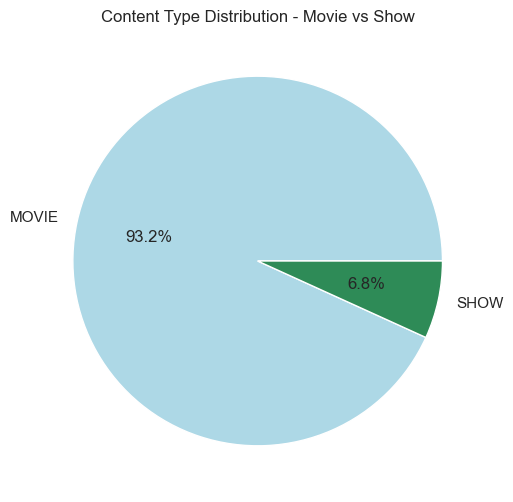

In [73]:
# Chart 1 : Univariate analysis on 'type' column 
# to understand the propotion of movies vs TV shows on the platform

type_counts = combined_df['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'seagreen'])
plt.title('Content Type Distribution - Movie vs Show')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are great for univariate analysis. This graph helps to understand the proportion of movies vs. TV shows on the Prime platform.

##### 2. What is/are the insight(s) found from the chart?

Movies constitutes significantly higher propotion of the graph, around 93%. this shows that Amazon prioritizes movies over TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focusing on movies might help with gaining audiences with interest in watching quick content. It might attract audiences to take membership to watch just a movie. However, not having enough TV shows or series might limit long term engagement. Introducing more diverse TV shows might help increase subscriptions.

#### Chart - 2

C:\Users\USER\AppData\Local\Temp\ipykernel_44908\4060839701.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres_df, palette='viridis')


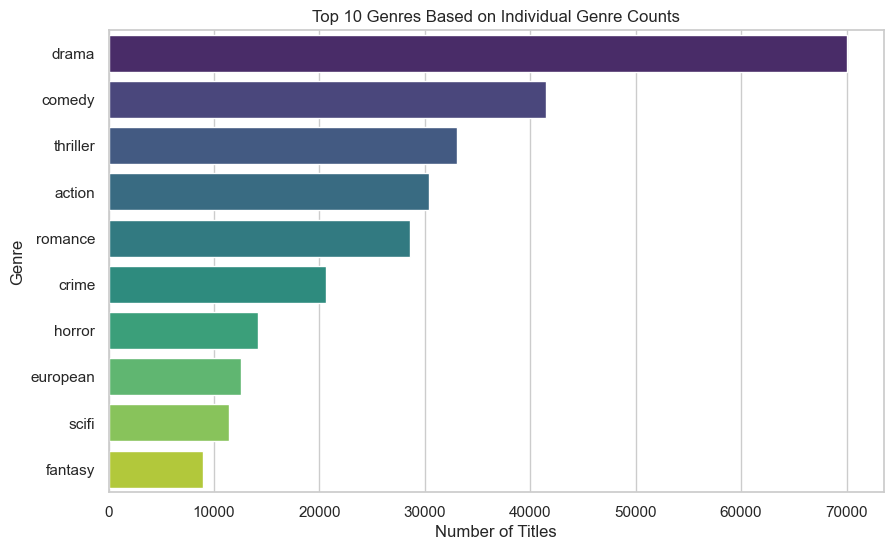

In [74]:
# Chart 2 : univariate analysis using bar chart 
# to find out the most popular genres

# Flatten all genre lists into one list 
# so as to count the number of each genre
all_genres = []

for genre_list in combined_df['genres_list']:
    if isinstance(genre_list, list):
        all_genres.extend(genre_list)
    else:
        # Handle cases where genres_list might be NaN or not a list
        continue

# Count frequency of each genre
genre_counts = Counter(all_genres)

# Convert to DataFrame for easy plotting
top_genres_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Genre', data=top_genres_df, palette='viridis')
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.title("Top 10 Genres Based on Individual Genre Counts")
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart is a good indicator to identify the most famous genres on the platform. One can easily identify the top genres by looking at the bar chart.

##### 2. What is/are the insight(s) found from the chart?

Drama, comedy, and thriller are the top genres on the platform with around 70000, 40000, and 32000 titles respectively. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Maintaining more content in these genres will attract wider audiences. however, neglecting niche genres or newer genres might limit diverse audiences, mostly the younger generations

#### Chart - 3

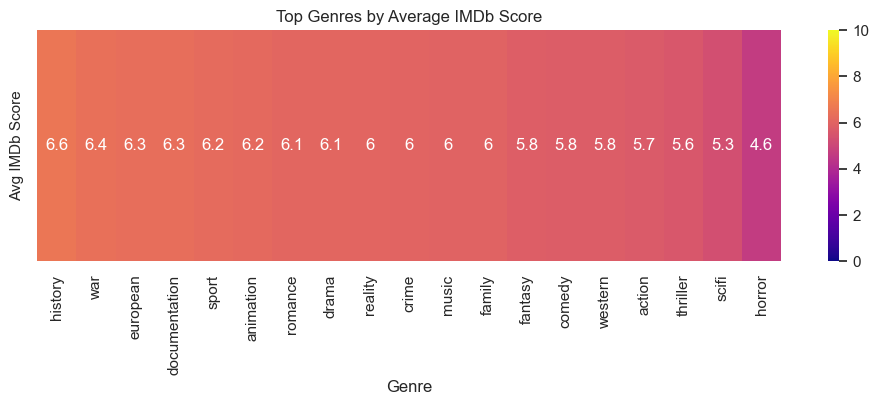

In [75]:
# Chart 3 - Bivariate graph to understand the top genres based on IMDB scores

# Here, the genre count calculated before is reused
# Map genre to total IMDb score sum and count for averaging
genre_score_sum = {}
genre_score_count = {}

for list_, score in zip(combined_df['genres_list'], combined_df['imdb_score']):
    if isinstance(list_, list):
        for g in list_:
            genre_score_sum[g] = genre_score_sum.get(g, 0) + score
            genre_score_count[g] = genre_score_count.get(g, 0) + 1

# Calculate average IMDb score for each genre
avg_scores = {g: genre_score_sum[g]/genre_score_count[g] for g in genre_score_sum}

# Convert to DataFrame and get top 20
top_genres_avg_score = pd.DataFrame(sorted(avg_scores.items(), key=lambda x: x[1], reverse=True)).head(20)
top_genres_avg_score.columns = ['Genre', 'Avg IMDb Score']

# Get min and max scores for color scaling
min_score = 0  
max_score = 10

# Plot heatmap to identify top scores
plt.figure(figsize=(12, 3))
sns.heatmap(
    top_genres_avg_score.set_index('Genre').T,
    annot=True,
    cmap='plasma',
    vmin=min_score,
    vmax=max_score
)
plt.title('Top Genres by Average IMDb Score')
plt.show()


##### 1. Why did you pick the specific chart?

The heatmap clear shows which genre tops when it comes to IMDB score.

##### 2. What is/are the insight(s) found from the chart?

History, war, eeuropean, documentation, sports and animation comes really close when we consider the IMDB scores. It looks like IMDB scores are higher for documentaries and sports, specially European ones. The ones on the lower sides show that the quality of those contents vary widely

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focusing and investing more on contents like documentaries with high IMDB scores can improve overall platform reputation and customer satisfaction

#### Chart - 4

C:\Users\USER\AppData\Local\Temp\ipykernel_44908\2973111968.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_44908\2973111968.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


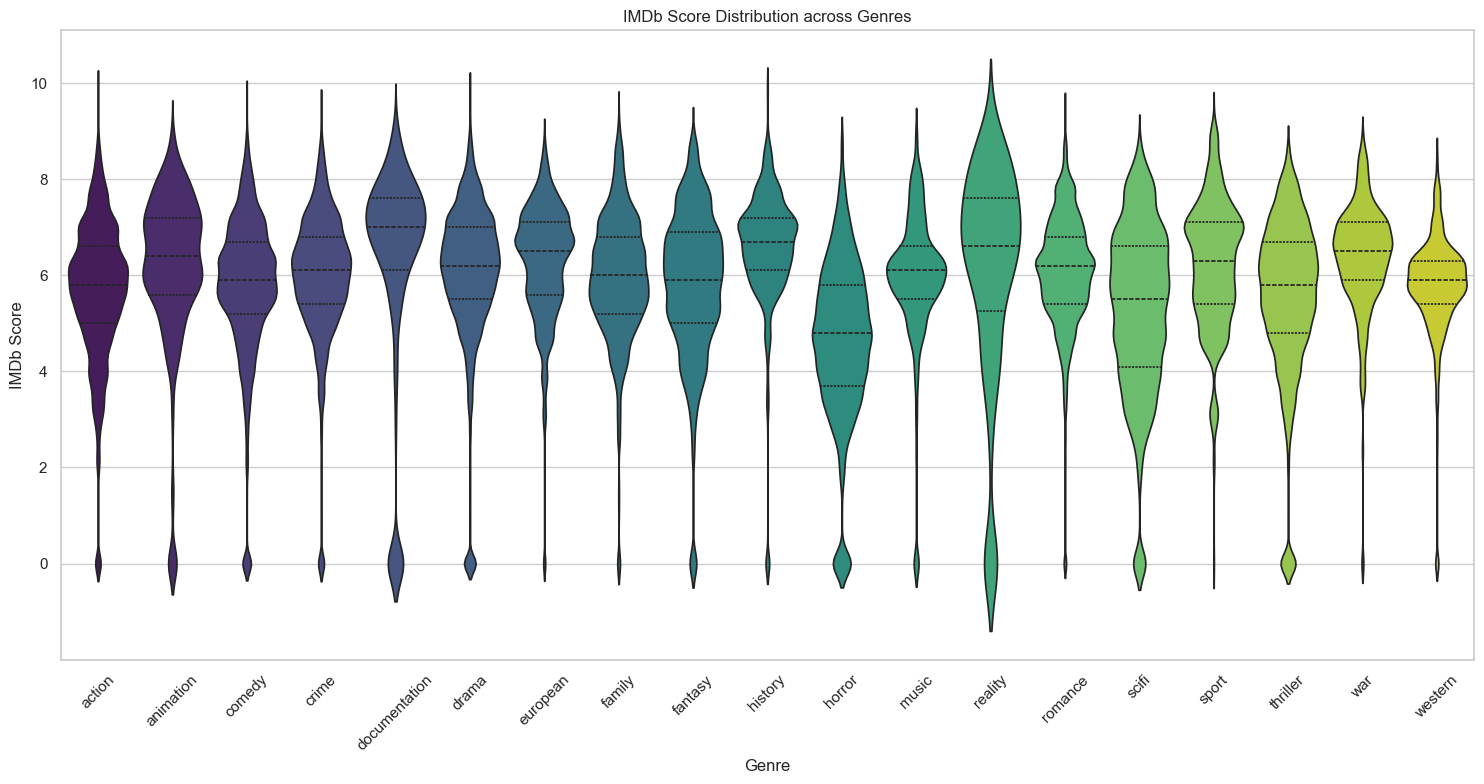

In [76]:
# Chart 4 : Bivariate violin plot to understand how 
#  IMDB scores are distributed across different genres

# Explode 'genres_list'
exploded_df = combined_df.explode('genres_list')

# Remove 'Unknown' or NaN genres if present
exploded_df = exploded_df[exploded_df['genres_list'].notnull() & (exploded_df['genres_list'] != 'Unknown')]

# Convert 'genres_list' to categorical with unique categories
exploded_df['genres_list'] = exploded_df['genres_list'].astype('category')

# Plot violin plot
plt.figure(figsize=(15,8))
sns.violinplot(
    x='genres_list', y='imdb_score', data=exploded_df,
    inner='quartile', scale='width', palette='viridis'
)
plt.xticks(rotation=45)
plt.title('IMDb Score Distribution across Genres')
plt.xlabel('Genre')
plt.ylabel('IMDb Score')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The violin plot helps to clearly understand how the IMDB scores are spread across each genre, and how the quality causes fluctuation in the score.

##### 2. What is/are the insight(s) found from the chart?

We can observe that genres like documentation has tightly clustered high scores. While for genres like horror, it is distributed along a wider area. this signifies inconsistent quality of the content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focusiing on content quality, content with high scores helps with better engagement and audience drive. 

#### Chart - 5

C:\Users\USER\AppData\Local\Temp\ipykernel_44908\3720208824.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_genre = exploded_df.groupby('genres_list')['tmdb_popularity'].mean().sort_values(ascending=False).head(20)
C:\Users\USER\AppData\Local\Temp\ipykernel_44908\3720208824.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_by_genre.values, y=popularity_by_genre.index, palette='viridis')


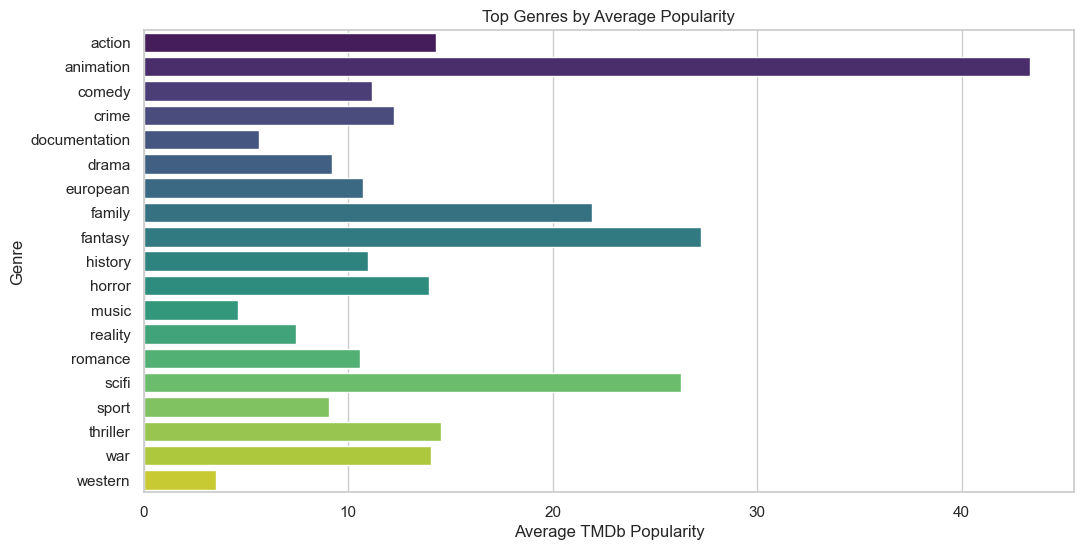

In [77]:
# Chart 5 : Bivariate bar graph to understand distribution of genre by TMDb scor

# Calculate mean popularity per genre
popularity_by_genre = exploded_df.groupby('genres_list')['tmdb_popularity'].mean().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=popularity_by_genre.values, y=popularity_by_genre.index, palette='viridis')
plt.xlabel('Average TMDb Popularity')
plt.ylabel('Genre')
plt.title('Top Genres by Average Popularity')
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart clearly shows the top genres based on TMBd score which gives a clear idea on genres famous among the viewers

##### 2. What is/are the insight(s) found from the chart?

Animation, fantasy and science fiction tops the TMDb ratings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Expanding and promoting high-interest genres like Scifi and animation can capture audience demand. Use this data to implement marketing strategies and promoting trending genres can help with increased subscriptions.

#### Chart - 6

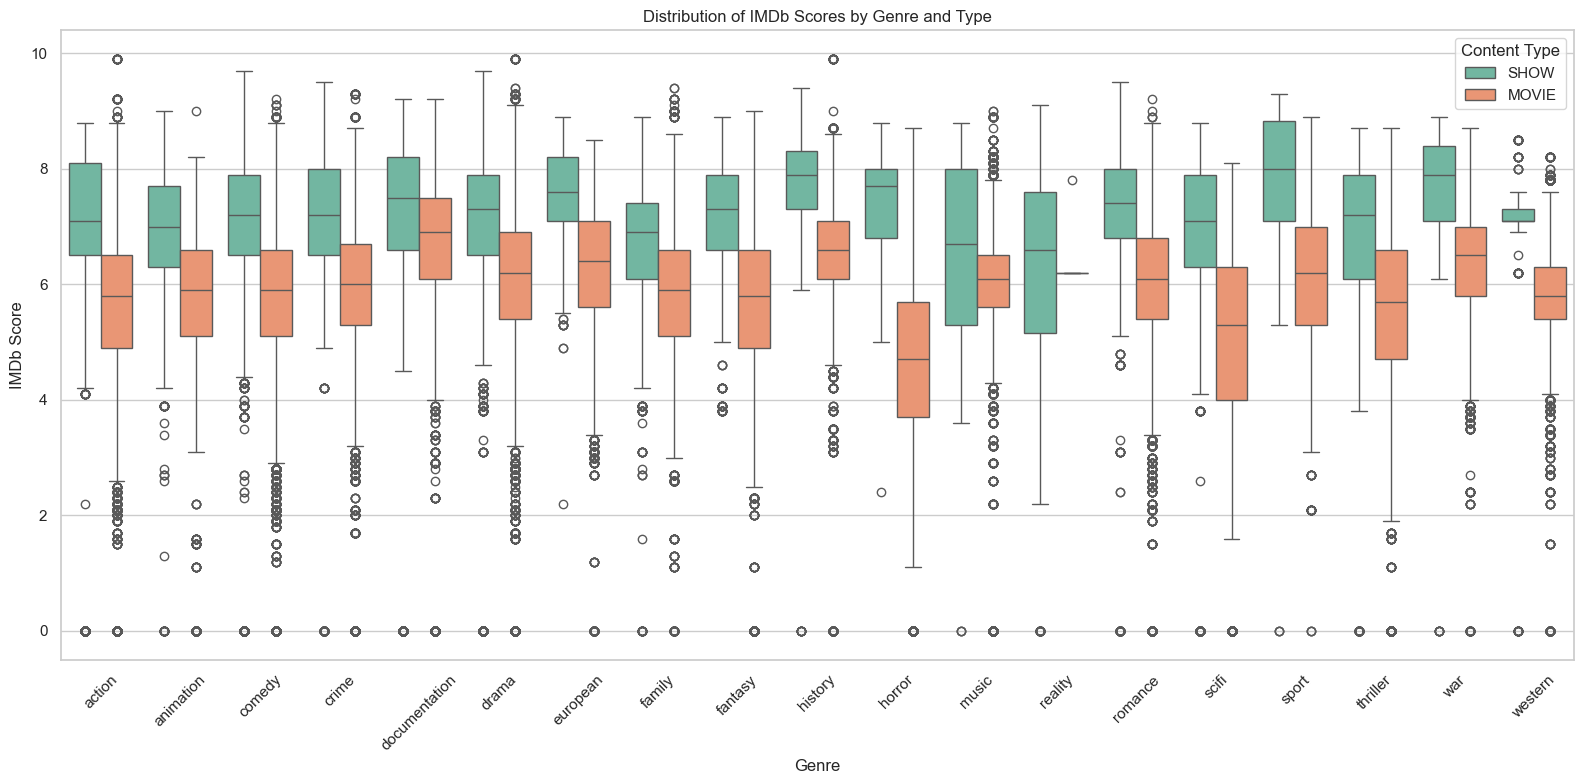

In [78]:
# Chart 6: Multivariate box plot of IMDb scores by genre and type
plt.figure(figsize=(16,8))
sns.boxplot(
    x='genres_list', y='imdb_score', hue='type', data=exploded_df,
    palette='Set2'
)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('IMDb Score')
plt.title('Distribution of IMDb Scores by Genre and Type')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The box plot helps to see how ratings within genres are for movies and shows. 

##### 2. What is/are the insight(s) found from the chart?

Shows have comparatively higher rating to movies

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From this and the previous insights, it is clear that focusing on shows more than movies can bring in more audiences and can help with marketing strategies too.

## Regional availability: How does content distribution vary across different regions?

#### Chart - 7

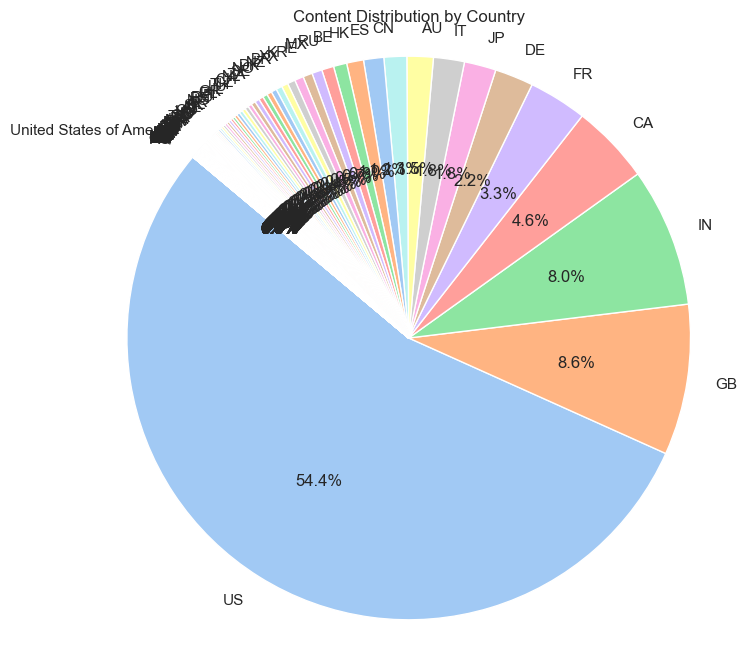

In [79]:
# Chart 7 : Univariate pie chart to understand the production countries distribution

# Parse the 'production_countries' column
def parse_countries(x):
    if pd.isnull(x):
        return []
    if isinstance(x, str):
        try:
            # Attempt to parse stringified list
            return ast.literal_eval(x)
        except:
            return [x]  # Treat as single country if parsing fails
    elif isinstance(x, list):
        return x
    else:
        return []

# Apply parsing
combined_df['prod_countries_list'] = combined_df['production_countries'].apply(parse_countries)

# Explode the list to get one country per row
exploded_countries = combined_df.explode('prod_countries_list')

# Remove null or empty entries
exploded_countries = exploded_countries[exploded_countries['prod_countries_list'].notnull()]

# Count the number of titles per country
country_counts = exploded_countries['prod_countries_list'].value_counts()

# Plot
plt.figure(figsize=(8,8))
plt.pie(
    country_counts,
    labels=country_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel', len(country_counts))
)
plt.title('Content Distribution by Country')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart helps to understand which production countries dominate the platform

##### 2. What is/are the insight(s) found from the chart?

US occupies a major share followed by Great Britain and India

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Regional marketing is necessary and Amazon should find strategies to expand the domain in areas with less production. Introducing more content from those areas can attract more audiences from there. Including regional programs for targeted audiences help.

#### Chart - 8

C:\Users\USER\AppData\Local\Temp\ipykernel_44908\1549396854.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index[:10], x=country_counts.values[:10], palette='viridis')


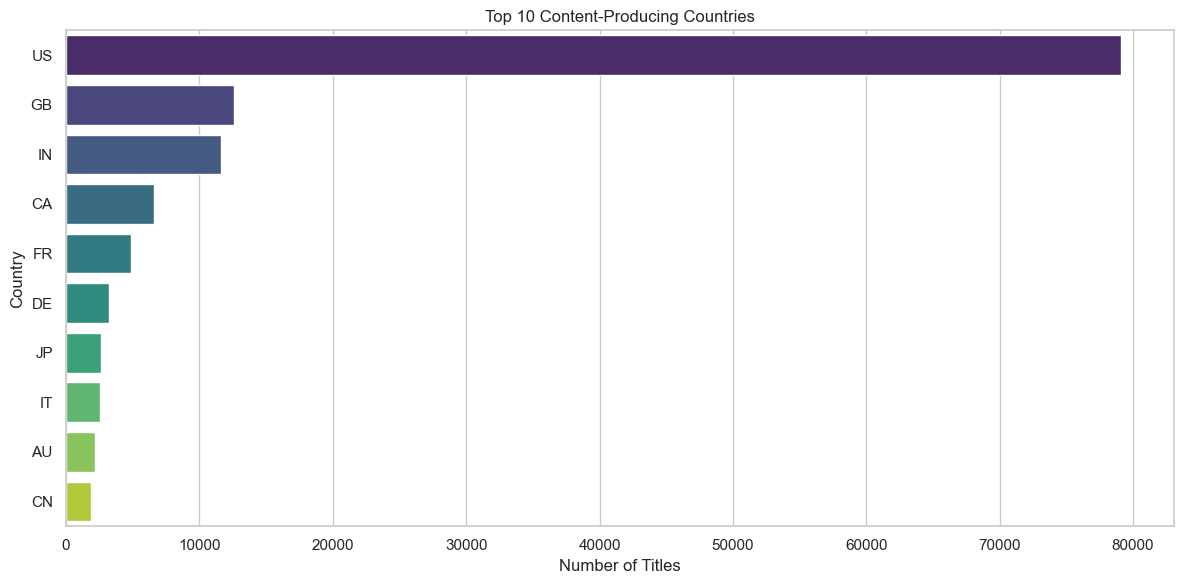

In [80]:
# Chart 8 : Bivariate analysis to understand the top region distribution 
# with the number of titles

# Plot
plt.figure(figsize=(12,6))
sns.barplot(y=country_counts.index[:10], x=country_counts.values[:10], palette='viridis')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Content-Producing Countries')
plt.tight_layout()
plt.show()# Prepare data: count per country and type


##### 1. Why did you pick the specific chart?

This helps understand the distribution better with the number of titles produced by each country. 

##### 2. What is/are the insight(s) found from the chart?

US dominates the list

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Regional marketing is necessary and Amazon should find strategies to expand the domain in areas with less production. Introducing more content from those areas can attract more audiences from there. Including regional programs for targeted audiences help.

#### Chart - 9

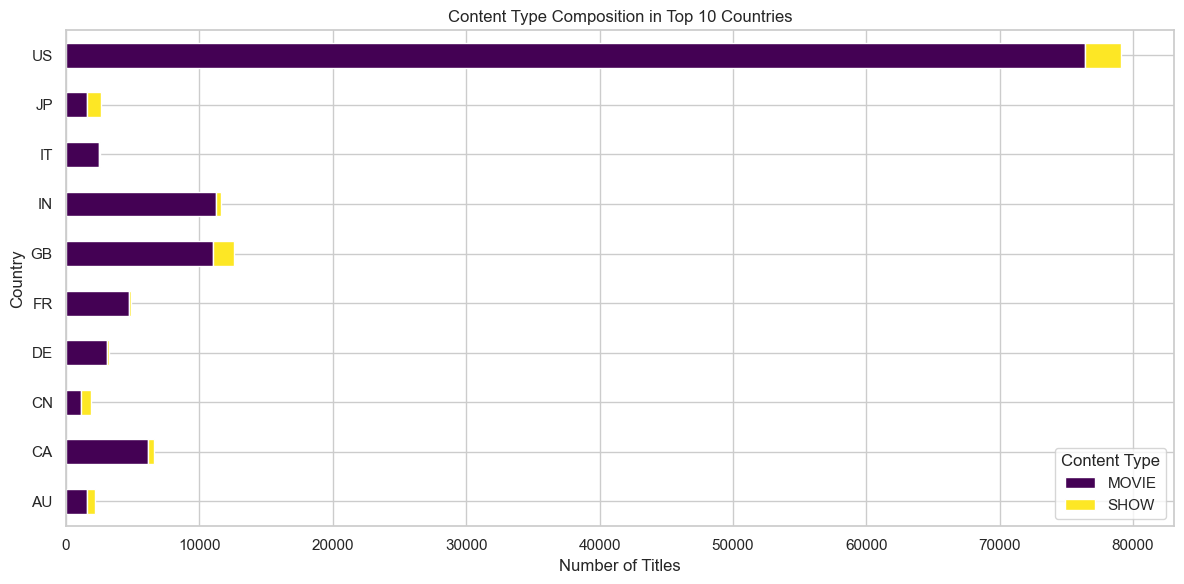

In [81]:
# Chart 9 : Multivariate analysis to find the distribution based on type and title

country_type_counts = exploded_countries.groupby(['prod_countries_list', 'type']).size().reset_index(name='counts')

# Keep top 10 countries
top_countries = country_counts.index[:10]
top_data = country_type_counts[country_type_counts['prod_countries_list'].isin(top_countries)]

# Pivot for plotting
pivot_df = top_data.pivot(index='prod_countries_list', columns='type', values='counts').fillna(0)

# Plot stacked horizontal bar chart
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(12,6), colormap='viridis')

# Add labels
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Content Type Composition in Top 10 Countries')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart helps to understand the distribution of movie and tv show production across different countries.

##### 2. What is/are the insight(s) found from the chart?

The movies are produced more by most countries.TV shows are very less

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Concentrating on introducing diverse tv show content can help the platform gain new and long term audiences. Concentrating only on movies can accumalate short term audiences

## Trends over time: How has amazon prime's content library evolved?

#### Chart - 10

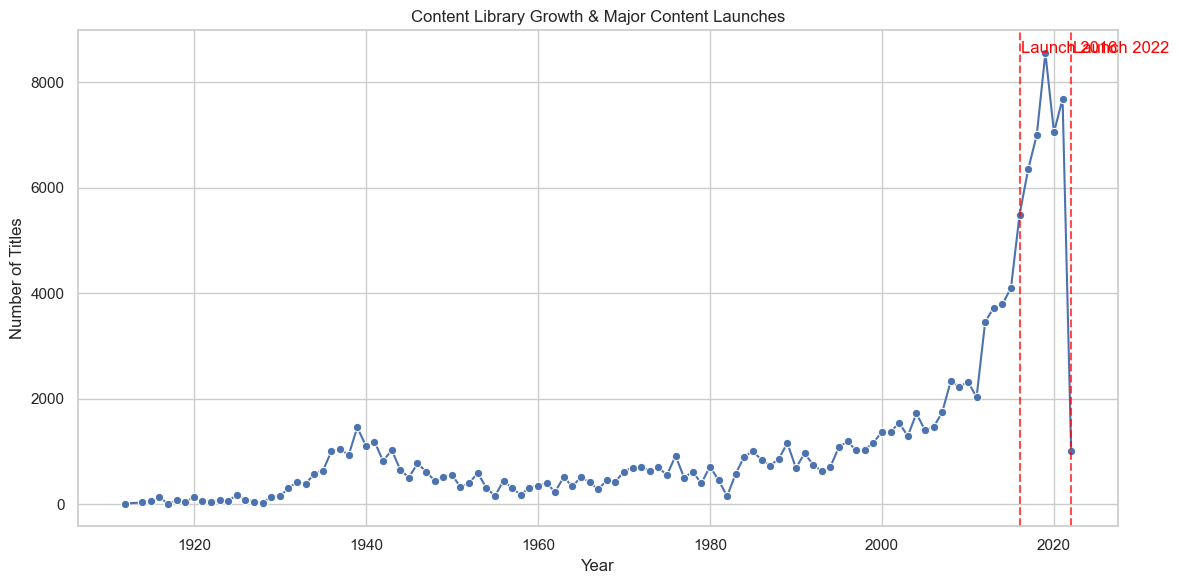

In [82]:
# Chart 10 : Line chart to understand the trend of releases

# Group by year and count titles
yearly_counts = combined_df.groupby('release_year').size().reset_index(name='num_titles')

# Sort by year
yearly_counts = yearly_counts.sort_values('release_year')

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='release_year', y='num_titles', data=yearly_counts, marker='o', ax=ax)
ax.set_ylabel('Number of Titles')
ax.set_xlabel('Year')
ax.set_title("Content Library Growth & Major Content Launches")
# Suppose we mark years of major launches (e.g., 2016, 2018)
for year in [2016, 2022]:
    ax.axvline(year, color='red', linestyle='--', alpha=0.7)
    ax.text(year+0.2, max(yearly_counts['num_titles']), f'Launch {year}', color='red')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

It helps to observe growth trend and identify periods of rapid expansion or stagnation in content addition

##### 2. What is/are the insight(s) found from the chart?

Plot reveals a generally upward trend. But there is an aggressive content acquisition after 2015.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recent increase indicates requirements for more strategic investments and allocation of marketing resources. Finding the right content will get difficult in future. proper analysis needs to be done for marketing and allocating resources.

#### Chart - 11

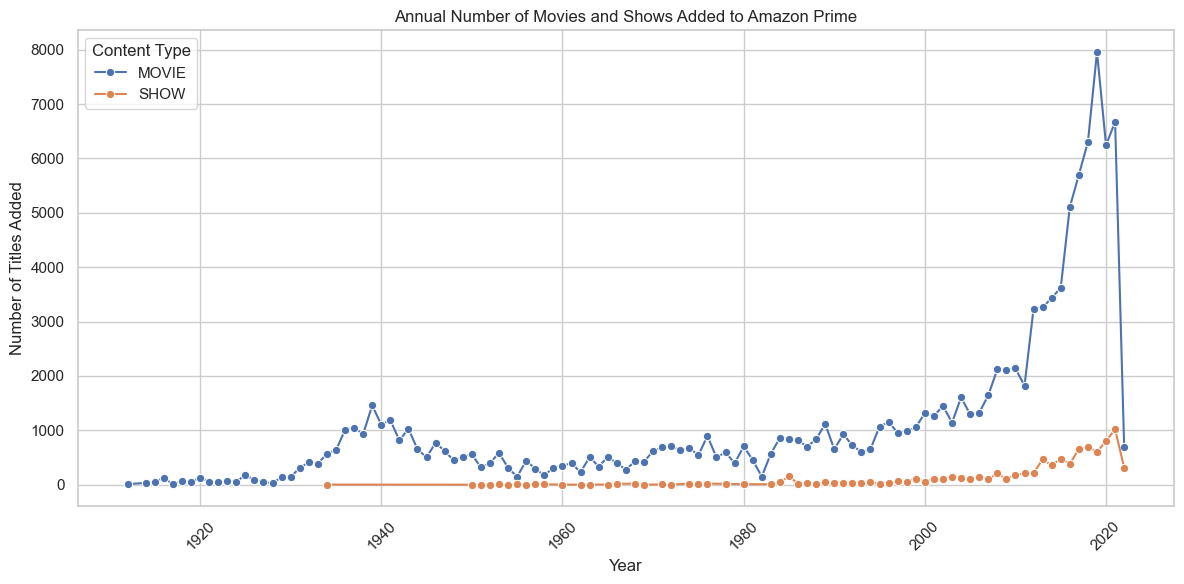

In [83]:
# Chart 11 : Understanding how types are evolved over years

# Group by year and type, then count titles
yearly_trend = combined_df.groupby(['release_year', 'type']).size().reset_index(name='num_titles')

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_trend, x='release_year', y='num_titles', hue='type', marker='o')
plt.title("Annual Number of Movies and Shows Added to Amazon Prime")
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Content Type')
plt.show()


##### 1. Why did you pick the specific chart?

The plot helps to find years the patterns based on the type. 

##### 2. What is/are the insight(s) found from the chart?

The shows started late compared to movies. There is growth in the both of them. However, movies are showing really high numbers as seen in other analyses.There is the spike for  both content types after 2015.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recent increase indicates requirements for more strategic investments and allocation of marketing resources. Finding the right content will get difficult in future. proper analysis needs to be done for marketing and allocating resources.

#### Chart - 12

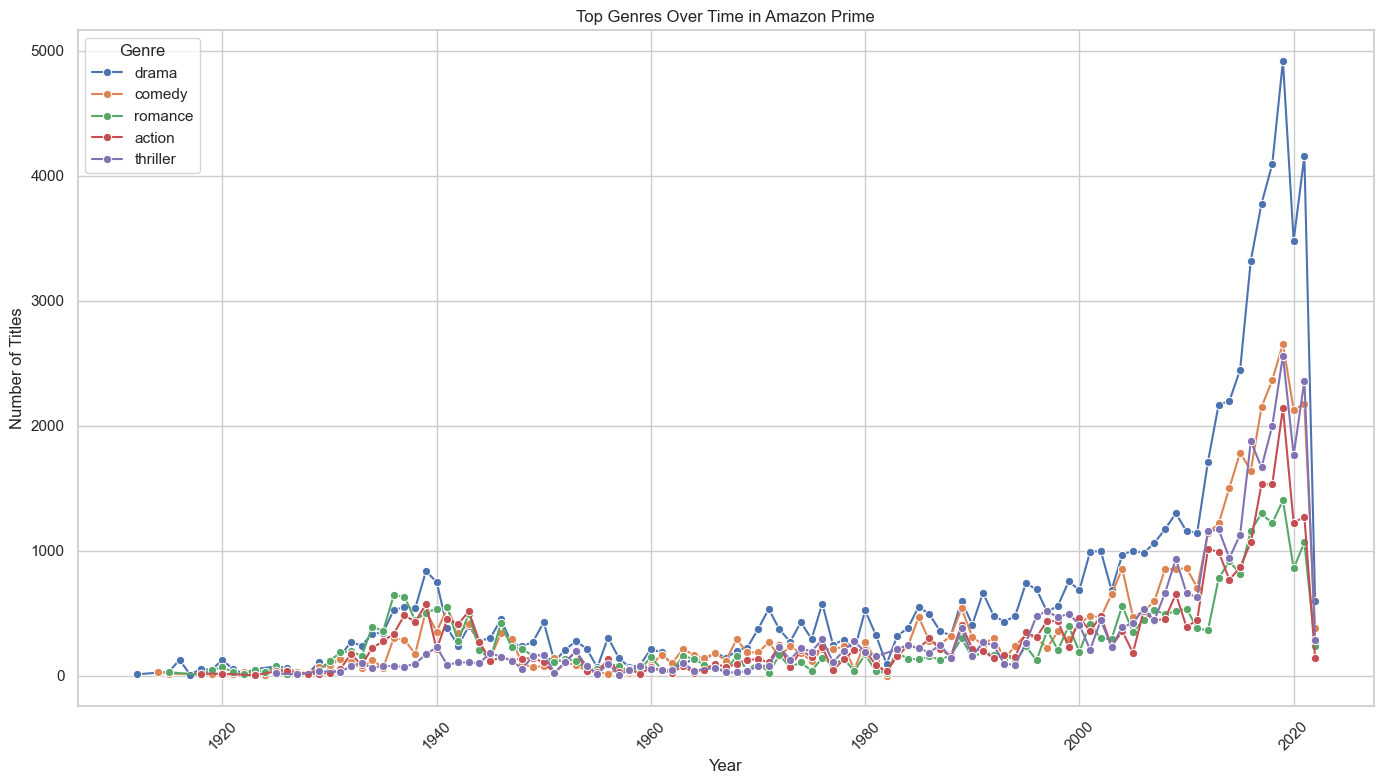

In [84]:
# Chart 12 - To understand how different genres have evolved over the years

exploded_genres = combined_df.explode('genres_list')

# Filter for non-empty genres
exploded_genres = exploded_genres[exploded_genres['genres_list'].notnull() & (exploded_genres['genres_list'] != 'Unknown')]

exploded_genres = exploded_genres[exploded_genres['genres_list'].notnull() & (exploded_genres['genres_list'] != 'Unknown')]

# Convert 'release_year' to numeric
exploded_genres['release_year'] = pd.to_numeric(exploded_genres['release_year'], errors='coerce')
exploded_genres = exploded_genres.dropna(subset=['release_year'])

top_genres = exploded_genres['genres_list'].value_counts().index[:5]
subset = exploded_genres[exploded_genres['genres_list'].isin(top_genres)]

# Group by year and genre, count titles
trend = subset.groupby(['release_year', 'genres_list']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(14,8))
sns.lineplot(data=trend, x='release_year', y='count', hue='genres_list', marker='o')
plt.title("Top Genres Over Time in Amazon Prime")
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To understand the evolution of different content over the year, the top five contents produced over the years are analysed

##### 2. What is/are the insight(s) found from the chart?

The lines shows how different genres have risen and declined over the decades. It reflects the market shifts, major releases and change in viewer's preferences. Drama has been dominating over the years. But genres like romance and action have peaks at specific periods. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is good to keep an eye on this trend to understand the trend and viewer preferences to do the marketing accordingly. Predicting the patterns can help bringing in necessary content in advance and being prepared in advance. This will also help with marketing the right content at the right times

## IMDb ratings & popularity: What are the highest rated or most popular shows on the platform?

#### Chart - 13

C:\Users\USER\AppData\Local\Temp\ipykernel_44908\1310432000.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_score', y='title', data=top_titles, palette='cividis')


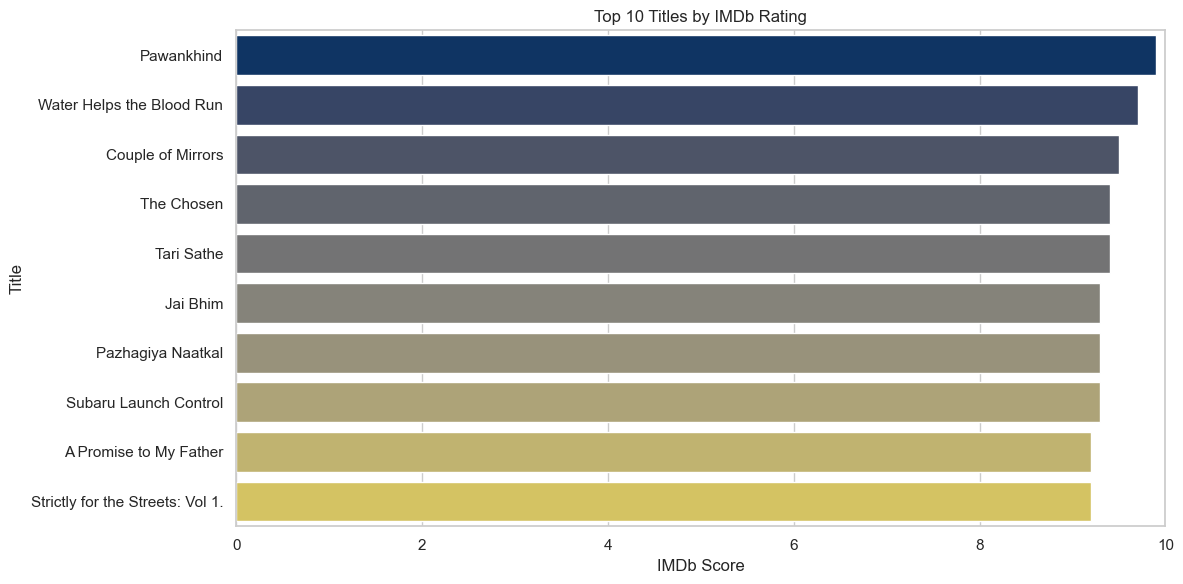

In [85]:
# Chart 13 - Find the top 10 ImDB rated shows_df

# Select distinct titles
distinct_titles = combined_df.drop_duplicates(subset='title')

# Sort by 'imdb_score' in descending order to get top-rated
top_titles = distinct_titles.sort_values(by='imdb_score', ascending=False).head(10)

# Plot top 10 titles by IMDb rating
plt.figure(figsize=(12,6))
sns.barplot(x='imdb_score', y='title', data=top_titles, palette='cividis')
plt.title('Top 10 Titles by IMDb Rating')
plt.xlabel('IMDb Score')
plt.ylabel('Title')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It helps to understand the top IMDB rated shows

##### 2. What is/are the insight(s) found from the chart?

There are mostly US and Indian movies and shows

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It gives an idea of the kind of audience and a tailored approach to marketing to these people can increase engagement

#### Chart - 14

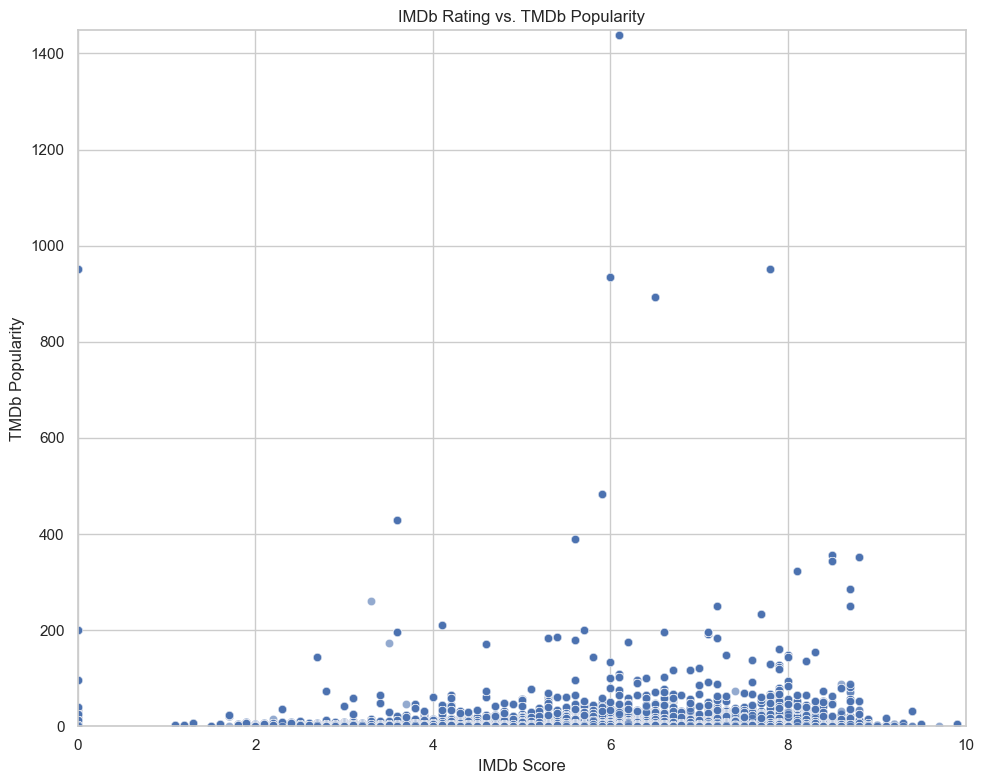

In [86]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='imdb_score', y='tmdb_popularity', data=combined_df, alpha=0.6)
plt.title('IMDb Rating vs. TMDb Popularity')
plt.xlabel('IMDb Score')
plt.ylabel('TMDb Popularity')
plt.xlim(0, 10)
plt.ylim(0, combined_df['tmdb_popularity'].max()+10)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

It helps to understand how the IMDB and TMdb scores are related

##### 2. What is/are the insight(s) found from the chart?

A positive correlation can be noticed. Higher IMDB ratings show higher TMDb ratings too. Some titles have very high popularity despite modest IMDb ratings or vice versa

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlight content with both high ratings and popularity to boost user engagement. Investigation is required on why certain titles perform well in popularity but not in ratings for strategic decisions in content promotion



#### Chart - 15 

C:\Users\USER\AppData\Local\Temp\ipykernel_44908\84495361.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_score', y='title', data=top_titles, palette='coolwarm')


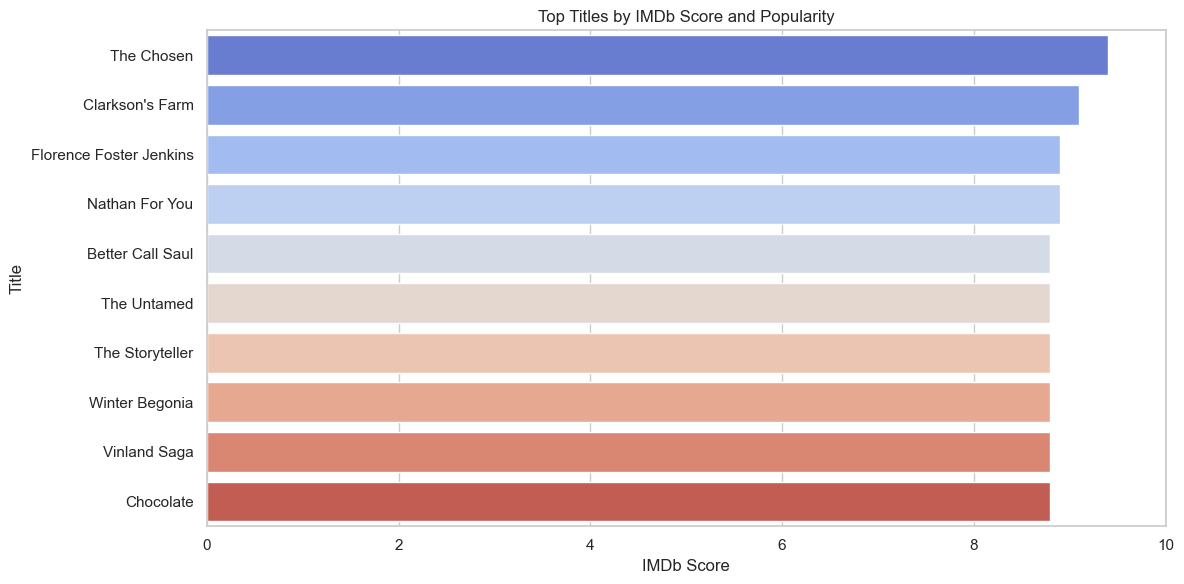

In [87]:
# Chart 15 - To find the top rated shows on both rating platforms


# Filter titles with high ratings and popularity
high_rated_popular = combined_df[
    (combined_df['imdb_score'] >= 8.0) &
    (combined_df['tmdb_popularity'] >= combined_df['tmdb_popularity'].quantile(0.75))
]

# Drop duplicate titles to ensure each is represented once
distinct_titles = high_rated_popular.drop_duplicates(subset='title')

# Select the top 10 titles based on IMDb score and popularity
top_titles = distinct_titles[['title', 'imdb_score', 'tmdb_popularity']].sort_values(by=['imdb_score', 'tmdb_popularity'], ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='imdb_score', y='title', data=top_titles, palette='coolwarm')
plt.title('Top Titles by IMDb Score and Popularity')
plt.xlabel('IMDb Score')
plt.ylabel('Title')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This helps to understand titles which have both IMDB and TMDb ratings high

##### 2. What is/are the insight(s) found from the chart?

When we consider both, some top ones before when we considered only one , are out of the list

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlight content with both high ratings and popularity to boost user engagement. Investigation is required on why certain titles perform well in popularity but not in ratings for strategic decisions in content promotion

### Chart 16 and 17

C:\Users\USER\AppData\Local\Temp\ipykernel_44908\854357236.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_score', y='title', data=top_movies, palette='YlOrRd')


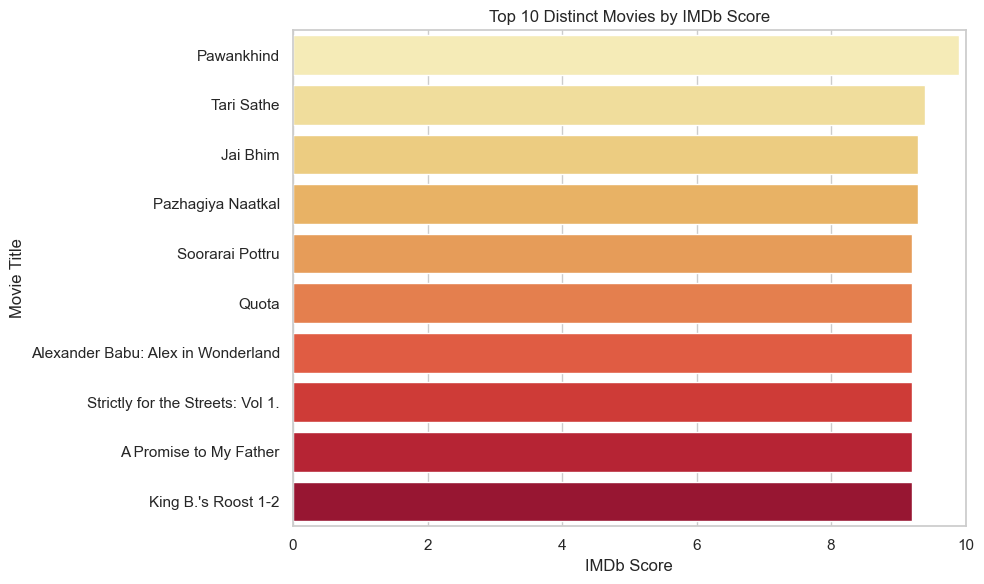

C:\Users\USER\AppData\Local\Temp\ipykernel_44908\854357236.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_score', y='title', data=top_shows, palette='YlGnBu')


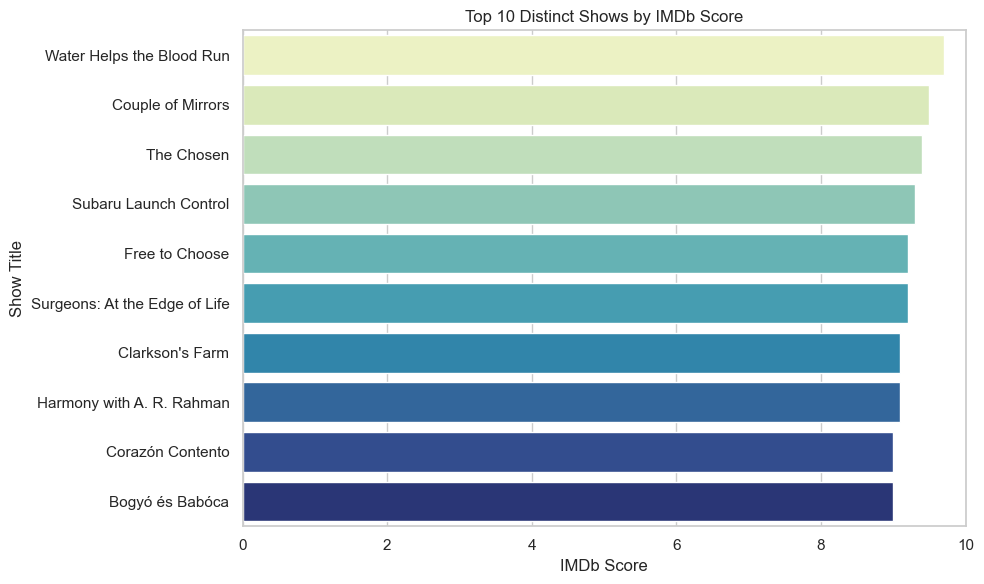

In [88]:
# chart 16 and 17 - Two graphs to show the top movies and shows separately based on IMDB score

# Filter for movies and shows separately
movies_df = combined_df[combined_df['type'].str.upper() == 'MOVIE']
shows_df = combined_df[combined_df['type'].str.upper() == 'SHOW']

# Get top 10 in each category based on 'imdb_score'
top_movies = movies_df.sort_values(by='imdb_score', ascending=False).drop_duplicates(subset='title').head(10)
top_shows = shows_df.sort_values(by='imdb_score', ascending=False).drop_duplicates(subset='title').head(10)

# Plot for top movies
plt.figure(figsize=(10, 6))
sns.barplot(x='imdb_score', y='title', data=top_movies, palette='YlOrRd')
plt.title('Top 10 Distinct Movies by IMDb Score')
plt.xlabel('IMDb Score')
plt.ylabel('Movie Title')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

# Plot for top shows
plt.figure(figsize=(10, 6))
sns.barplot(x='imdb_score', y='title', data=top_shows, palette='YlGnBu')
plt.title('Top 10 Distinct Shows by IMDb Score')
plt.xlabel('IMDb Score')
plt.ylabel('Show Title')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It helps to understand the top rated shows by the type of show

##### 2. What is/are the insight(s) found from the chart?

The top ones can be identified and marketed properly

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlight content with both high ratings and popularity to boost user engagement. Investigation is required on why certain titles perform well in popularity but not in ratings for strategic decisions in content promotion

### Chart 18 and 19

C:\Users\USER\AppData\Local\Temp\ipykernel_44908\3623505959.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title_count', y='name', data=top_actors.head(10), palette='Blues')


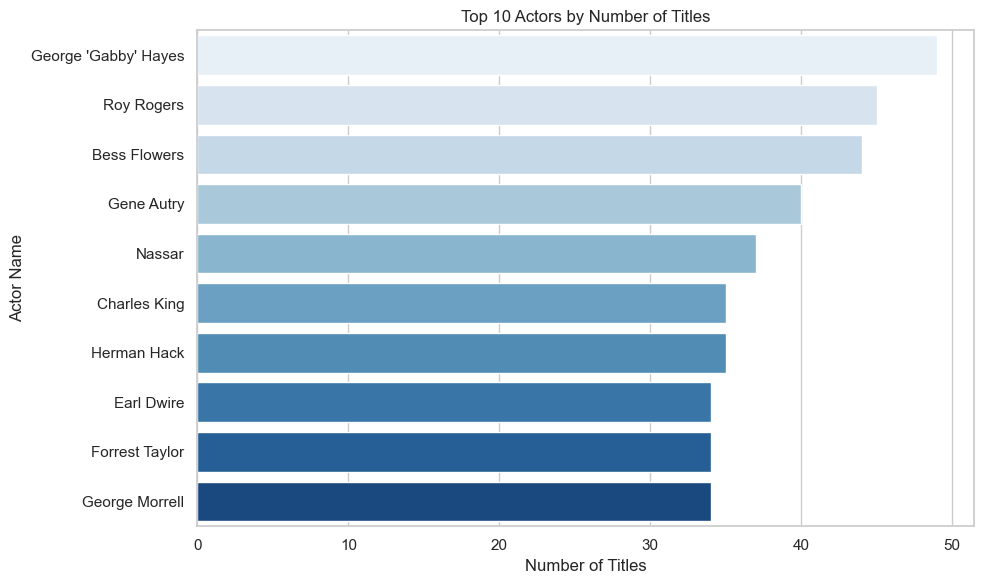

C:\Users\USER\AppData\Local\Temp\ipykernel_44908\3623505959.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title_count', y='name', data=top_directors.head(10), palette='Greens')


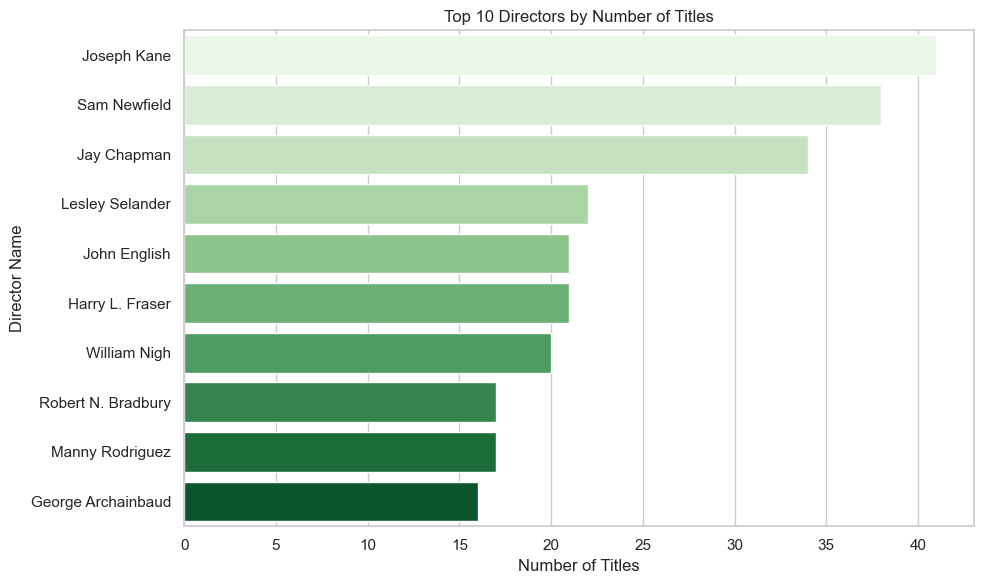

In [89]:
# Chart 18 and 19 - Top Actors and directors by number of titles
# Filter actors
actors_df = combined_df[combined_df['role'].str.lower() == 'actor']

# Count titles per actor
top_actors = actors_df.groupby('name').size().reset_index(name='title_count').sort_values(by='title_count', ascending=False)

# Filter directors
directors_df = combined_df[combined_df['role'].str.lower() == 'director']

# Count titles per director
top_directors = directors_df.groupby('name').size().reset_index(name='title_count').sort_values(by='title_count', ascending=False)

# Plot Top 10 Actors
plt.figure(figsize=(10,6))
sns.barplot(x='title_count', y='name', data=top_actors.head(10), palette='Blues')
plt.title('Top 10 Actors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Actor Name')
plt.tight_layout()
plt.show()

# Plot Top 10 Directors
plt.figure(figsize=(10,6))
sns.barplot(x='title_count', y='name', data=top_directors.head(10), palette='Greens')
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director Name')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

It helps to understand the top rated actors and directors by the number of titles

##### 2. What is/are the insight(s) found from the chart?

The top ones can be identified and marketed properly

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlight content with actor/director popularity to boost user engagement.

### Chart 20 and 21

C:\Users\USER\AppData\Local\Temp\ipykernel_44908\2660028674.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_score', y='name', data=top_actors_imdb, palette='Blues')


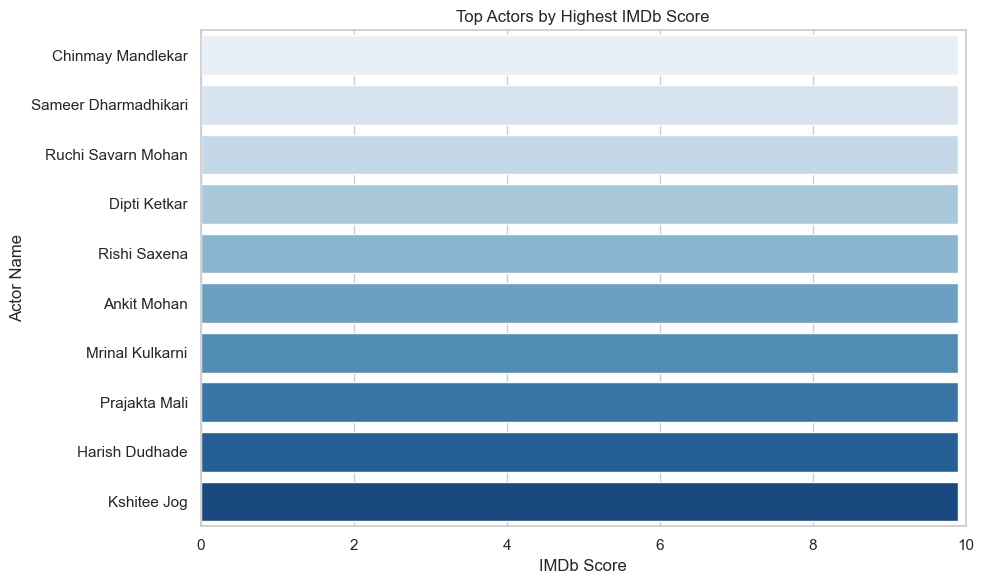

C:\Users\USER\AppData\Local\Temp\ipykernel_44908\2660028674.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_score', y='name', data=top_directors_imdb, palette='Greens')


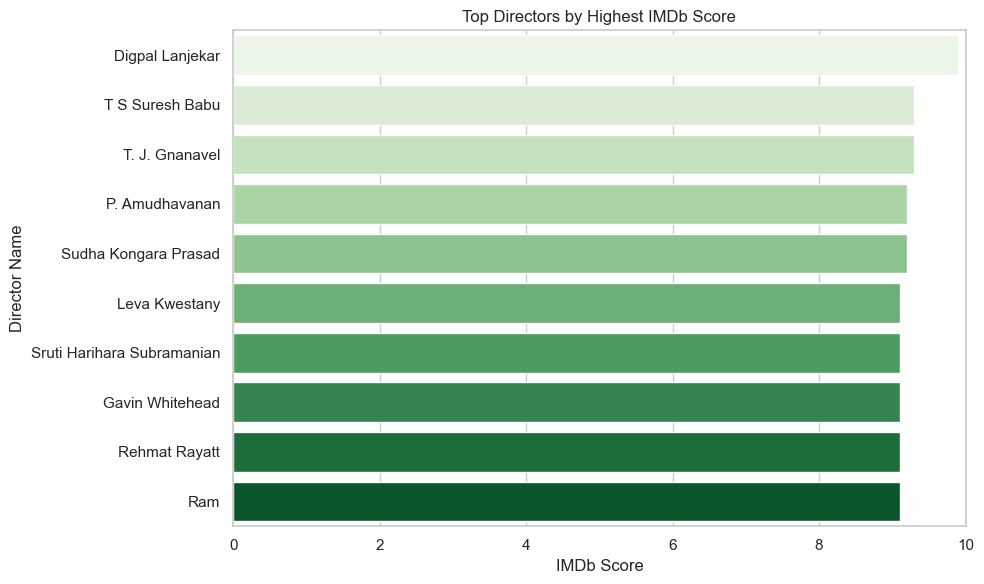

In [90]:
# Aggregate: compute max IMDb and TMDb scores per actor
top_actors = actors_df.groupby('name').agg({
    'imdb_score': 'max',
    'tmdb_score': 'max'
}).reset_index()

# Similarly for directors
top_directors = directors_df.groupby('name').agg({
    'imdb_score': 'max',
    'tmdb_score': 'max'
}).reset_index()

# Get top 10 based on highest IMDb score
top_actors_imdb = top_actors.sort_values(by='imdb_score', ascending=False).head(10)
top_directors_imdb = top_directors.sort_values(by='imdb_score', ascending=False).head(10)

# Get top 10 based on highest TMDb score
top_actors_tmdb = top_actors.sort_values(by='tmdb_score', ascending=False).head(10)
top_directors_tmdb = top_directors.sort_values(by='tmdb_score', ascending=False).head(10)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Top Actors - Highest IMDb
plt.figure(figsize=(10,6))
sns.barplot(x='imdb_score', y='name', data=top_actors_imdb, palette='Blues')
plt.title('Top Actors by Highest IMDb Score')
plt.xlabel('IMDb Score')
plt.ylabel('Actor Name')
plt.xlim(0,10)
plt.tight_layout()
plt.show()

# Plot Top Directors - Highest IMDb
plt.figure(figsize=(10,6))
sns.barplot(x='imdb_score', y='name', data=top_directors_imdb, palette='Greens')
plt.title('Top Directors by Highest IMDb Score')
plt.xlabel('IMDb Score')
plt.ylabel('Director Name')
plt.xlim(0,10)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It helps to understand the top rated actors and directors by IMDB score

##### 2. What is/are the insight(s) found from the chart?

The top ones can be identified and marketed properly

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlight content with actor/director popularity to boost user engagement.

### Chart - 22 : Pair plot

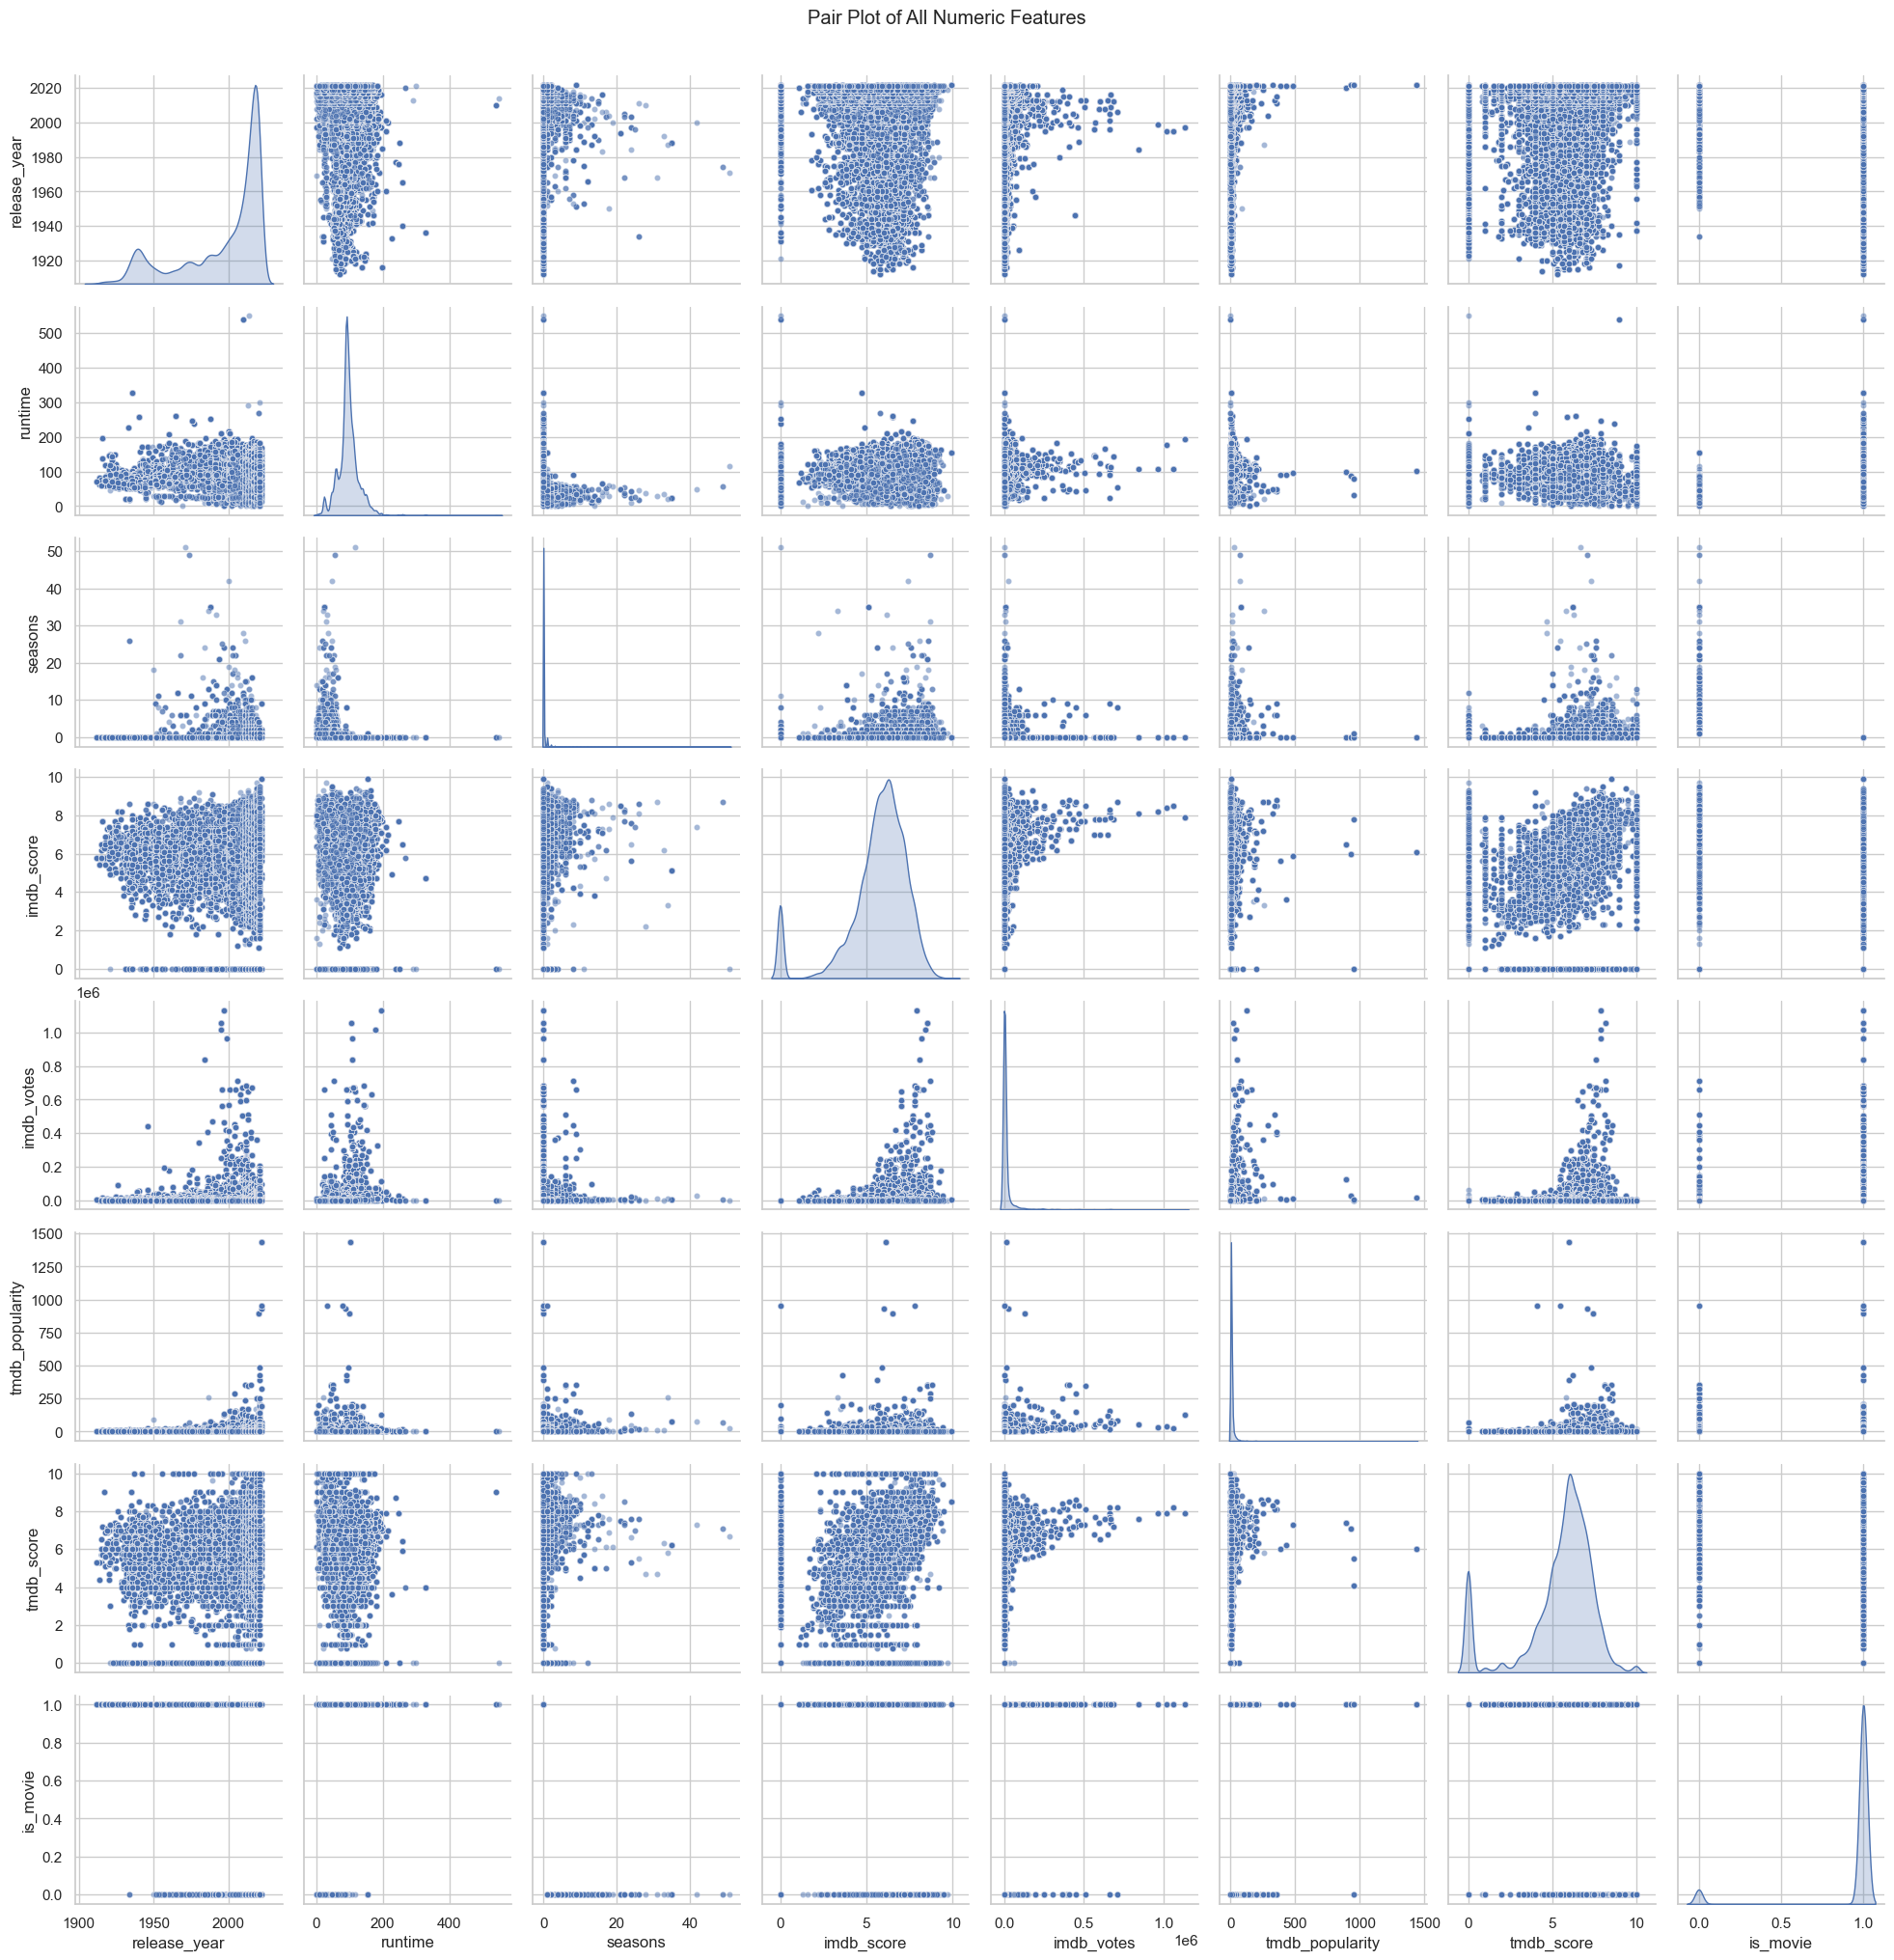

In [91]:
#Chart 18 - Pairwise plot

# Select only numeric features
numeric_df = combined_df.select_dtypes(include='number')

# Generate pairplot
sns.pairplot(numeric_df, diag_kind='kde', plot_kws={'alpha':0.5, 's':20})
plt.suptitle("Pair Plot of All Numeric Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

It helps to understand how various numerical features are correlated to each other.

##### 2. What is/are the insight(s) found from the chart?
This pairplot helps us understand how all the numerical features in the dataset are related. We see that imdb_score and tmdb_score are somewhat connected, meaning titles that do well on IMDb usually also do well on TMDb. Similarly, imdb_votes and tmdb_popularity tend to go hand in hand. titles with more votes are usually more popular. The release year shows that newer titles tend to have slightly higher ratings, which makes sense since recent content often gets more attention. Most movies and shows fall within typical values for runtime and seasons, but there are some very long or outlier titles. Also, many titles have low votes and popularity, but a few get extremely high numbers. Overall, ratings across the platforms are fairly aligned, but some titles stand out with very high scores and popularity. The variety in release years, duration, votes, and popularity shows that the platform offers a wide range of content spanning different times and formats. These insights can help decide what kind of content to promote or produce to keep viewers happy and attract more subscribers.



### Chart - 23 : Correlation Heatmap

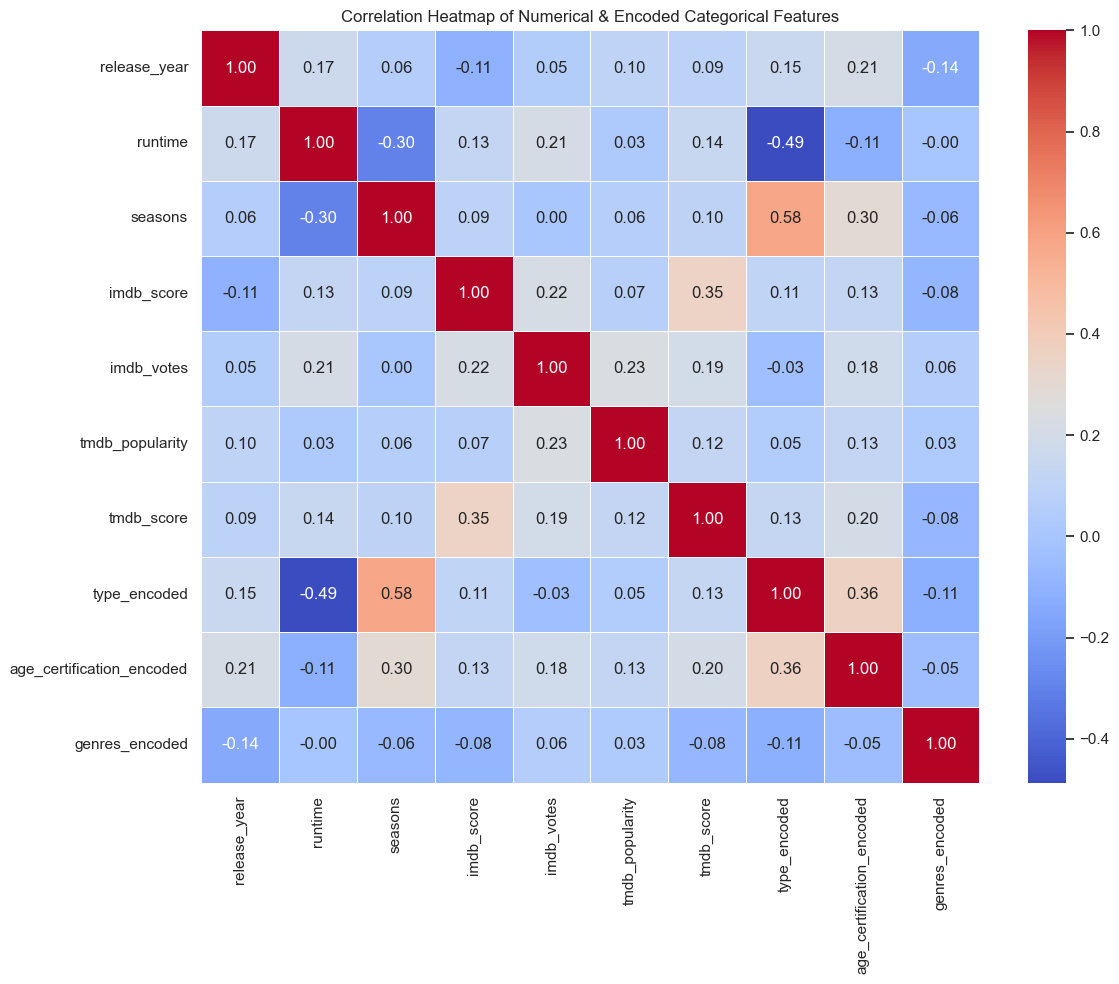

In [93]:
# Chart 23 - Correlation map
# We are using Label encoder here to encode categorical values
from sklearn.preprocessing import LabelEncoder

# Select categorical columns you want to encode
categorical_cols = ['type', 'age_certification', 'genres']

# Encode categorical columns without modifying the original columns (create new columns)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    combined_df[col + '_encoded'] = le.fit_transform(combined_df[col].astype(str))
    label_encoders[col] = le

# Select only numerical features and the new encoded columns
correlation_features = ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
encoded_cols = [col + '_encoded' for col in categorical_cols]

# Combine only the relevant columns
df_for_corr = combined_df[correlation_features + encoded_cols]

# Calculate and plot the correlation matrix
corr_matrix = df_for_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical & Encoded Categorical Features')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It helps to understand how various numerical features are correlated to each other.

##### 2. What is/are the insight(s) found from the chart?
The correlation heatmap provides valuable insights into the relationships among numerical and encoded categorical features in the dataset. It shows that IMDb scores and TMDb scores are moderately correlated (around 0.35), indicating consistency in ratings across platforms. Similarly, IMDb votes and TMDb popularity scores have a positive correlation (about 0.23), suggesting that titles with more votes tend to be more popular. release_year shows minimal linear relationship with other features, implying that both newer and older content can achieve high ratings and popularity. Features like seasons, runtime, and the encoded categories exhibit low to moderate correlations, indicating they do not strongly influence ratings or metrics in a linear way. Notably, the encoded type and genre features are negatively correlated (-0.49), suggesting certain genres are more associated with specific content types. These correlations imply that high ratings often align with popularity, but content age and certain runtime or genre features are less predictive of viewer preference. Overall, these insights can help guide content acquisition and marketing strategies by focusing on factors most strongly associated with higher ratings and popularity.





## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the performance analyzis so far, some strategic suggestion can be made to help achieve the business objectives. Primarily, focus on high performing content, by promoting top rated titles, actors and directors. Expand content in growing or popular genres. Keep track of the patterns in different genres and allocate resources and do marketing in advance. capitalizing on popular genres like drama, comedy, romance, etc will help to grow the user base. However, explore genre areas that are diverse and unique too to bring in new and diverse audiences. strengthen regional content strategy by promoting content on top countries. In addition to this, focus on regional content creation to make the platform active on countries which aren't popular in the production list. A balance between the new and classic content is required to satisfy all audiences. data driven insights can be given by giving suggestion on the platform, personalised recommendation, hightlight awards, or critical acclaims. Show the IMDB and popularity ratings to attract users. A model can be developed to bring content upfront based on trend and patterns.

# **Conclusion**

The analysis gives useful insights into the Amazon Prime content library. The process started by cleaning and merging the data to make sure it was reliable. Different patterns, such as what genres are popular, which regions create most of the content, and how the content has grown over time were studied. In addition to this, ratings and popularity to find the best titles that viewers like the most was also conducted. By examining the talent behind the titles, actors and directors who are the most involved in top content were identified. 

These insights can help Amazon Prime make better decisions. They can focus on promoting popular titles and genres. In addition, Amazon can also invest more in regions with high potential. Understanding what content performs well can help increase viewers and subscriptions, and also help the platform stay ahead of competitors by choosing the right content to add. 

In conclusion, focusing on promoting top-rated content, popular genres, and regional titles can help boost viewer satisfaction and growth. Using data insights to guide content inputs and marketing will strengthen Amazon Prime’s user engagement and popularity.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***